This notebook leverages W266's materials/walkthrough_notebooks/bert-finetuning/BERT_Fine-tuning materials


https://github.com/datasci-w266/2022-spring-main/blob/master/materials/walkthrough_notebooks/bert-finetuning/BERT_Fine-tuning.ipynb

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/MyDrive/w266final

/content/gdrive/MyDrive/w266final


In [ ]:
!pip install transformers

from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

import transformers

from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import backend as K

import logging
tf.get_logger().setLevel(logging.ERROR)

     |████████████████████████████████| 4.0 MB 14.4 MB/s 
     |████████████████████████████████| 596 kB 60.2 MB/s 
     |████████████████████████████████| 6.5 MB 47.2 MB/s 
     |████████████████████████████████| 895 kB 53.2 MB/s 
     |████████████████████████████████| 77 kB 7.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
test = pd.read_csv("data/strat_test.csv")
train = pd.read_csv("data/strat_training.csv")
val = pd.read_csv("data/strat_val.csv")

In [ ]:
print(len(test))
print(len(train))
print(len(val))

print(len(test) + len(train) + (len(val)))


193
1604
201
1998


In [ ]:
# full = pd.concat([test, train, val])
# full_df = pd.DataFrame(data=full)
# tags_df = full_df[[ 'admiration', ' amusement', ' anger', ' annoyance', ' approval',
#        ' caring', ' confusion', ' curiosity', ' desire', ' disappointment',
#        ' disapproval', ' disgust', ' embarrassment', ' excitement', ' fear',
#        ' gratitude', ' grief', ' joy', ' love', ' nervousness', ' optimism',
#        ' pride', ' realization', ' relief', 'remorse', ' sadness', ' surprise',
#        ' neutral']]
# tags_df['tags'] = tags_df.apply(lambda row: row[row == 1].index.tolist(), axis=1)
# full_df['tags'] = tags_df['tags'].values
# full_df

In [ ]:
# tf.config.list_physical_devices('GPU')

In [ ]:
# tf.__version__

In [ ]:
# transformers.__version__

## Preprocess Data

In [ ]:
# #stratified data from top tag
# from sklearn.model_selection import train_test_split


# test_split = 0.2

# # Initial train and test split.
# train_df_strat, test_df_strat = train_test_split(
#     full_df,
#     test_size=test_split,
#     stratify=full_df['top_tag'],
# )

# # Splitting the test set further into validation
# # and new test sets.
# val_df_strat = test_df_strat.sample(frac=0.5)
# test_df_strat.drop(val_df_strat.index, inplace=True)

# print(f"Number of rows in training set: {len(train_df_strat)}")
# print(f"Number of rows in validation set: {len(val_df_strat)}")
# print(f"Number of rows in test set: {len(test_df_strat)}")

In [ ]:
train_label = train[['admiration', ' amusement', ' anger', ' annoyance', ' approval',
       ' caring', ' confusion', ' curiosity', ' desire', ' disappointment',
       ' disapproval', ' disgust', ' embarrassment', ' excitement', ' fear',
       ' gratitude', ' grief', ' joy', ' love', ' nervousness', ' optimism',
       ' pride', ' realization', ' relief', 'remorse', ' sadness', ' surprise',
       ' neutral']].to_numpy()

test_label = test[['admiration', ' amusement', ' anger', ' annoyance', ' approval',
       ' caring', ' confusion', ' curiosity', ' desire', ' disappointment',
       ' disapproval', ' disgust', ' embarrassment', ' excitement', ' fear',
       ' gratitude', ' grief', ' joy', ' love', ' nervousness', ' optimism',
       ' pride', ' realization', ' relief', 'remorse', ' sadness', ' surprise',
       ' neutral']].to_numpy() 

val_label = val[['admiration', ' amusement', ' anger', ' annoyance', ' approval',
       ' caring', ' confusion', ' curiosity', ' desire', ' disappointment',
       ' disapproval', ' disgust', ' embarrassment', ' excitement', ' fear',
       ' gratitude', ' grief', ' joy', ' love', ' nervousness', ' optimism',
       ' pride', ' realization', ' relief', 'remorse', ' sadness', ' surprise',
       ' neutral']].to_numpy() 

In [ ]:
train_str = train[['target_string']].to_numpy() 
test_str = test[['target_string']].to_numpy() 
val_str = val[['target_string']].to_numpy() 

In [ ]:
# full_df['string'].apply(lambda x: len(x.split(" "))).describe()

## BERT Model

In [ ]:
#bert base cased model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# max_length = 80

# x_train = tokenizer([str(x) for x in train_str],
#               max_length=max_length,
#               truncation=True,
#               padding='max_length', 
#               return_tensors='tf')
# y_train = train_label


# x_test = tokenizer([str(x) for x in test_str],
#               max_length=max_length,
#               truncation=True,
#               padding='max_length', 
#               return_tensors='tf')
# y_test = test_label


# x_val = tokenizer([str(x) for x in val_str],
#               max_length=max_length,
#               truncation=True,
#               padding='max_length', 
#               return_tensors='tf')
# y_val = val_label




# # x_test = tokenizer([str(x.numpy())[2:] for x in test_examples_batch[:num_test_examples]], 
# #               max_length=max_length,
# #               truncation=True,
# #               padding='max_length', 
# #               return_tensors='tf')
# # y_test = test_labels_batch[:num_test_examples]


# # x_tiny = tokenizer([str(x.numpy())[2:] for x in test_examples_batch[:num_tiny_set]], 
# #               max_length=max_length,
# #               truncation=True,
# #               padding='max_length', 
# #               return_tensors='tf')
# # y_tiny = test_labels_batch[:num_tiny_set]

In [ ]:
def tokenize(tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')):
  tokenize.max_length = 80

  tokenize.x_train = tokenizer([str(x) for x in train_str],
                max_length=tokenize.max_length,
                truncation=True,
                padding='max_length', 
                return_tensors='tf')
  tokenize.y_train = train_label


  tokenize.x_test = tokenizer([str(x) for x in test_str],
                max_length=tokenize.max_length,
                truncation=True,
                padding='max_length', 
                return_tensors='tf')
  tokenize.y_test = test_label


  tokenize.x_val = tokenizer([str(x) for x in val_str],
                max_length=tokenize.max_length,
                truncation=True,
                padding='max_length', 
                return_tensors='tf')
  tokenize.y_val = val_label

  return tokenize.x_train, tokenize.y_train, tokenize.x_test, tokenize.y_test,
  tokenize.x_val, tokenize.y_val

In [ ]:
tokenize()

({'input_ids': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[ 101, 1031, 1005, ...,    0,    0,    0],
        [ 101, 1031, 1000, ...,    0,    0,    0],
        [ 101, 1031, 1000, ...,    0,    0,    0],
        ...,
        [ 101, 1031, 1000, ...,    0,    0,    0],
        [ 101, 1031, 1005, ...,    0,    0,    0],
        [ 101, 1031, 1000, ...,    0,    0,    0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>},
 array([[

In [ ]:
# x_train.keys()

In [ ]:
# x_train.input_ids

In [ ]:
# x_train.token_type_ids

In [ ]:
# x_train.attention_mask

In [ ]:
# [x.name for x in model.weights]

In [ ]:
# bert_out = model(x_val, output_hidden_states=True)

In [ ]:
# len(bert_out)

In [ ]:
# bert_out[0].numpy().shape

In [ ]:
# bert_out[1].numpy().shape

In [ ]:
# len(bert_out[2])

In [ ]:
# [x.shape for x in bert_out[2]]

### Classification Model 

In [ ]:
from keras import backend as K

def custom_f1(y_true, y_pred):    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        
        recall = TP / (Positives+K.epsilon())    
        return recall 
    
    
    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    
        precision = TP / (Pred_Positives+K.epsilon())
        return precision 
    
    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)
    
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
# def create_classification_model(hidden_size = 200, 
#                                 train_layers = -1, 
#                                 optimizer=tf.keras.optimizers.Adam()):
#     """
#     Build a classification model with BERT
#     """

#     input_ids = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='input_ids_layer')
#     token_type_ids = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='token_type_ids_layer')
#     attention_mask = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='attention_mask_layer')

#     bert_inputs = {'input_ids': input_ids,
#                   'token_type_ids': token_type_ids,
#                   'attention_mask': attention_mask}


#     #restrict training to the train_layers outer transformer layers
#     if not train_layers == -1:

#             retrain_layers = []

#             for retrain_layer_number in range(train_layers):

#                 layer_code = '_' + str(11 - retrain_layer_number)
#                 retrain_layers.append(layer_code)

#             for w in model.weights:
#                 if not any([x in w.name for x in retrain_layers]):
#                     w._trainable = False


#     bert_out = model(bert_inputs)


#     classification_token = tf.keras.layers.Lambda(lambda x: x[:,0,:], name='get_first_vector')(bert_out[0])


#     hidden = tf.keras.layers.Dense(hidden_size, name='hidden_layer')(classification_token)

#     classification = tf.keras.layers.Dense(28, activation='sigmoid',name='classification_layer')(hidden)

#     classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], 
#                                           outputs=[classification])
    
#     classification_model.compile(optimizer=optimizer,
#                             loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
#                             metrics=[tf.keras.metrics.Accuracy(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), custom_f1])


#     return classification_model

In [ ]:
def create_classification_model(hidden_size = 200, 
                                train_layers = -1, 
                                optimizer=tf.keras.optimizers.Adam()):
    """
    Build a classification model with BERT
    """

    input_ids = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='attention_mask_layer')

    bert_inputs = {'input_ids': input_ids,
                  'token_type_ids': token_type_ids,
                  'attention_mask': attention_mask}


    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False


    bert_out = model(bert_inputs)


    hidden = tf.keras.layers.Dense(hidden_size, name='hidden_layer')(bert_out[1])

    classification = tf.keras.layers.Dense(28, activation='sigmoid',name='classification_layer')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], 
                                          outputs=[classification])
    
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    
    classification_model.compile(optimizer=optimizer,
                                 loss = loss,
                                 metrics=[tf.keras.metrics.BinaryAccuracy('accuracy'), 
                                          tf.keras.metrics.Precision(), 
                                          tf.keras.metrics.Recall(), 
                                          custom_f1])


    return classification_model

In [ ]:
def fit_eval_model(epoch_num = 15, batch_num = 53, learning = 0.001, layers=-1):
    """
    Fit, evaulate, and plot the model's F1 scores
    """
    
    #create and fit model
    classification_model = create_classification_model(train_layers=layers, optimizer=tf.keras.optimizers.Adam(learning))
    history = classification_model.fit([tokenize.x_train.input_ids, tokenize.x_train.token_type_ids, tokenize.x_train.attention_mask],
                         tokenize.y_train,
                         validation_data=([tokenize.x_val.input_ids, tokenize.x_val.token_type_ids, tokenize.x_val.attention_mask],
                         tokenize.y_val),
                        epochs = epoch_num,
                        batch_size = batch_num)

    #plot results
    f1_train = history.history['custom_f1']
    f1_val = history.history['val_custom_f1']
    epochs = range(1,(epoch_num + 1))
    plt.plot(epochs, f1_train, label='Training F1 Score')
    plt.plot(epochs, f1_val, label='Validation F1 Score')
    plt.title('Training and Validation F1')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()
    
    return classification_model.evaluate(x=[tokenize.x_test.input_ids, tokenize.x_test.token_type_ids, tokenize.x_test.attention_mask], y = tokenize.y_test,  return_dict=True)
    return plt

Epoch 1/15
31/31 [==============================] - 36s 604ms/step - loss: 0.2568 - accuracy: 0.8980 - precision: 0.0652 - recall: 0.0801 - custom_f1: 0.0499 - val_loss: 0.1951 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 2/15
31/31 [==============================] - 16s 507ms/step - loss: 0.1755 - accuracy: 0.9506 - precision: 0.3913 - recall: 0.0041 - custom_f1: 0.0263 - val_loss: 0.1917 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1744 - accuracy: 0.9494 - precision: 0.2933 - recall: 0.0199 - custom_f1: 0.0430 - val_loss: 0.1900 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1753 - accuracy: 0.9502 - precision: 0.2951 - recall: 0.0081 - custom_f1: 0.0295 - val_loss:

{'accuracy': 0.954107940196991,
 'custom_f1': 0.01393728144466877,
 'loss': 0.15858182311058044,
 'precision': 0.0,
 'recall': 0.0}

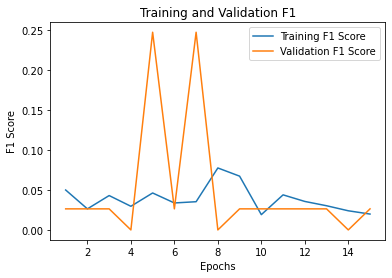

In [ ]:
fit_eval_model()

### Lower Learning Rate

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/15
31/31 [==============================] - 34s 605ms/step - loss: 0.2807 - accuracy: 0.9049 - precision: 0.0584 - recall: 0.0615 - custom_f1: 0.0494 - val_loss: 0.1853 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 2/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1694 - accuracy: 0.9508 - precision: 0.6000 - recall: 0.0014 - custom_f1: 0.0249 - val_loss: 0.1829 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 505ms/step - loss: 0.1643 - accuracy: 0.9506 - precision: 0.4744 - recall: 0.0167 - custom_f1: 0.0497 - val_loss: 0.1712 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0501
Epoch 4/15
31/31 [==============================] - 16s 505ms/step - loss: 0.1526 - accuracy: 0.9519 - precision: 0.5982 - recall: 0.0896 - custom_f1: 0.1578 - val_loss:

{'accuracy': 0.9502221345901489,
 'custom_f1': 0.2963600754737854,
 'loss': 0.2341572642326355,
 'precision': 0.44155845046043396,
 'recall': 0.27419355511665344}

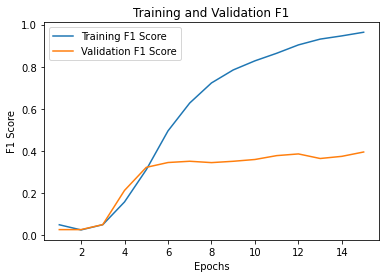

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

fit_eval_model(learning = 0.00005)

We can see there's improvement with lowering the learning rate from the default of .001 to .00005. Let's see if this model benefits from more epochs of training.

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/50
31/31 [==============================] - 36s 608ms/step - loss: 0.2919 - accuracy: 0.9009 - precision: 0.0402 - recall: 0.0443 - custom_f1: 0.0344 - val_loss: 0.1833 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 2/50
31/31 [==============================] - 16s 507ms/step - loss: 0.1692 - accuracy: 0.9508 - precision: 0.5000 - recall: 4.5249e-04 - custom_f1: 0.0243 - val_loss: 0.1810 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/50
31/31 [==============================] - 16s 506ms/step - loss: 0.1654 - accuracy: 0.9510 - precision: 0.6818 - recall: 0.0068 - custom_f1: 0.0389 - val_loss: 0.1713 - val_accuracy: 0.9481 - val_precision: 0.5385 - val_recall: 0.1433 - val_custom_f1: 0.2311
Epoch 4/50
31/31 [==============================] - 16s 506ms/step - loss: 0.1560 - accuracy: 0.9521 - precision: 0.6346 - recall: 0.0747 - custom_f1: 0.1434 - val_loss: 0.1

{'accuracy': 0.9480014443397522,
 'custom_f1': 0.28674405813217163,
 'loss': 0.6078541874885559,
 'precision': 0.4117647111415863,
 'recall': 0.2822580635547638}

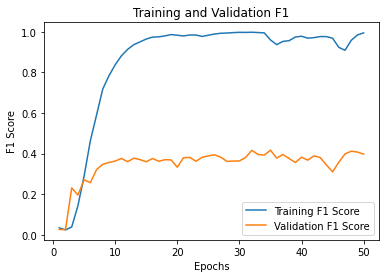

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

fit_eval_model(epoch_num = 50, learning = 0.00005)

Based on the above, there were no clear benefits for training for 50 epochs. We will now try lowering the learning rate further.

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/15
31/31 [==============================] - 35s 617ms/step - loss: 0.4557 - accuracy: 0.8280 - precision: 0.1006 - recall: 0.3127 - custom_f1: 0.1832 - val_loss: 0.2696 - val_accuracy: 0.9431 - val_precision: 0.3614 - val_recall: 0.1024 - val_custom_f1: 0.1612
Epoch 2/15
31/31 [==============================] - 16s 505ms/step - loss: 0.2319 - accuracy: 0.9496 - precision: 0.3399 - recall: 0.0235 - custom_f1: 0.0592 - val_loss: 0.2044 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 505ms/step - loss: 0.1907 - accuracy: 0.9508 - precision: 0.5000 - recall: 0.0027 - custom_f1: 0.0288 - val_loss: 0.1886 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1777 - accuracy: 0.9507 - precision: 0.0000e+00 - recall: 0.0000e+00 - custom_f1: 0.0230 - val_loss:

{'accuracy': 0.9546632766723633,
 'custom_f1': 0.25524649024009705,
 'loss': 0.14695142209529877,
 'precision': 0.5263158082962036,
 'recall': 0.2016129046678543}

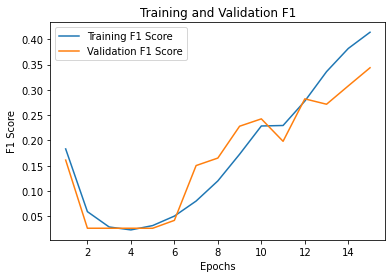

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

fit_eval_model(learning = 0.00001)

It looks like there's still room for improvement in the training with 15 epochs above. We will now try with 50 epochs. 

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/50
31/31 [==============================] - 42s 607ms/step - loss: 0.4782 - accuracy: 0.7970 - precision: 0.0974 - recall: 0.3760 - custom_f1: 0.1625 - val_loss: 0.2615 - val_accuracy: 0.9469 - val_precision: 0.2000 - val_recall: 0.0068 - val_custom_f1: 0.0597
Epoch 2/50
31/31 [==============================] - 16s 505ms/step - loss: 0.2259 - accuracy: 0.9503 - precision: 0.3333 - recall: 0.0104 - custom_f1: 0.0471 - val_loss: 0.1966 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/50
31/31 [==============================] - 16s 505ms/step - loss: 0.1849 - accuracy: 0.9508 - precision: 0.5714 - recall: 0.0018 - custom_f1: 0.0290 - val_loss: 0.1847 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/50
31/31 [==============================] - 16s 505ms/step - loss: 0.1747 - accuracy: 0.9507 - precision: 0.1667 - recall: 4.5249e-04 - custom_f1: 0.0240 - val_loss: 0.1

{'accuracy': 0.9502220153808594,
 'custom_f1': 0.26737135648727417,
 'loss': 0.21792928874492645,
 'precision': 0.43478259444236755,
 'recall': 0.24193547666072845}

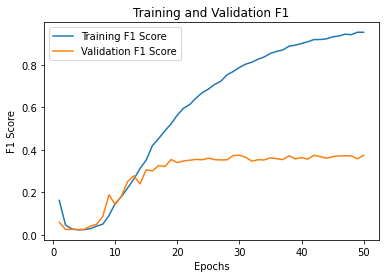

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

fit_eval_model(epoch_num = 50, learning = 0.00001)

It looks like there were no clear benefits for training for 50 epochs compared to 15 epochs. Let's try dropping the learning rate even lower to ensure we are using the optimal learning rate.

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/15
31/31 [==============================] - 35s 606ms/step - loss: 0.5945 - accuracy: 0.7219 - precision: 0.0800 - recall: 0.4421 - custom_f1: 0.1484 - val_loss: 0.4167 - val_accuracy: 0.8838 - val_precision: 0.1577 - val_recall: 0.2799 - val_custom_f1: 0.2145
Epoch 2/15
31/31 [==============================] - 16s 506ms/step - loss: 0.3369 - accuracy: 0.9287 - precision: 0.2018 - recall: 0.1498 - custom_f1: 0.1837 - val_loss: 0.2523 - val_accuracy: 0.9415 - val_precision: 0.3621 - val_recall: 0.1433 - val_custom_f1: 0.2047
Epoch 3/15
31/31 [==============================] - 16s 505ms/step - loss: 0.2377 - accuracy: 0.9475 - precision: 0.3813 - recall: 0.0995 - custom_f1: 0.1673 - val_loss: 0.2113 - val_accuracy: 0.9490 - val_precision: 0.5938 - val_recall: 0.0648 - val_custom_f1: 0.1417
Epoch 4/15
31/31 [==============================] - 16s 506ms/step - loss: 0.2054 - accuracy: 0.9489 - precision: 0.3892 - recall: 0.0620 - custom_f1: 0.1203 - val_loss: 0.1961 - val_accuracy: 

{'accuracy': 0.9561434984207153,
 'custom_f1': 0.1766318529844284,
 'loss': 0.15072312951087952,
 'precision': 0.625,
 'recall': 0.12096773833036423}

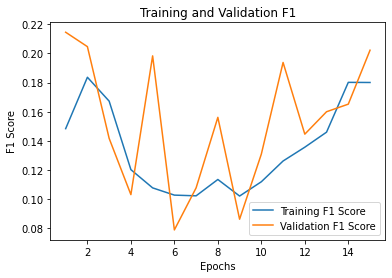

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

fit_eval_model(learning = 0.000005)

It looks like there's still room for improvement in the training with 15 epochs above. We will now try with 50 epochs. 

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/50
31/31 [==============================] - 35s 612ms/step - loss: 0.5202 - accuracy: 0.7778 - precision: 0.0604 - recall: 0.2412 - custom_f1: 0.1009 - val_loss: 0.3612 - val_accuracy: 0.9449 - val_precision: 0.0526 - val_recall: 0.0034 - val_custom_f1: 0.0507
Epoch 2/50
31/31 [==============================] - 16s 505ms/step - loss: 0.3157 - accuracy: 0.9461 - precision: 0.0433 - recall: 0.0045 - custom_f1: 0.0423 - val_loss: 0.2621 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/50
31/31 [==============================] - 16s 504ms/step - loss: 0.2463 - accuracy: 0.9508 - precision: 0.0000e+00 - recall: 0.0000e+00 - custom_f1: 0.0264 - val_loss: 0.2249 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/50
31/31 [==============================] - 16s 505ms/step - loss: 0.2147 - accuracy: 0.9508 - precision: 1.0000 - recall: 4.5249e-04 - custom_f1: 0.0266 - val_l

{'accuracy': 0.9524427056312561,
 'custom_f1': 0.2763509452342987,
 'loss': 0.1650724560022354,
 'precision': 0.4761904776096344,
 'recall': 0.24193547666072845}

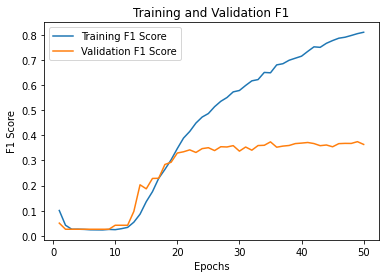

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

fit_eval_model(epoch_num = 50, learning = 0.000005)

### Batch Sizes

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/15
17/17 [==============================] - 98s 1s/step - loss: 0.3364 - accuracy: 0.8798 - precision: 0.0711 - recall: 0.1195 - custom_f1: 0.0962 - val_loss: 0.1936 - val_accuracy: 0.9488 - val_precision: 0.8571 - val_recall: 0.0205 - val_custom_f1: 0.0448
Epoch 2/15
17/17 [==============================] - 15s 883ms/step - loss: 0.1742 - accuracy: 0.9505 - precision: 0.4483 - recall: 0.0235 - custom_f1: 0.0552 - val_loss: 0.1830 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0046
Epoch 3/15
17/17 [==============================] - 15s 883ms/step - loss: 0.1685 - accuracy: 0.9508 - precision: 0.5517 - recall: 0.0072 - custom_f1: 0.0299 - val_loss: 0.1781 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0184
Epoch 4/15
17/17 [==============================] - 15s 912ms/step - loss: 0.1644 - accuracy: 0.9514 - precision: 0.6835 - recall: 0.0244 - custom_f1: 0.0793 - val_loss: 0.1720 - v

{'accuracy': 0.9511472582817078,
 'custom_f1': 0.28456249833106995,
 'loss': 0.16703692078590393,
 'precision': 0.4532374143600464,
 'recall': 0.2540322542190552}

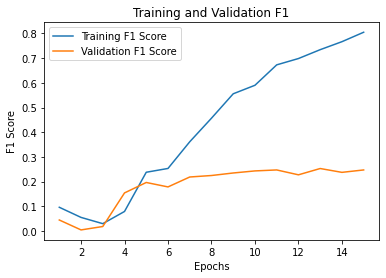

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

fit_eval_model(batch_num = 100, learning = 0.00005)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/15
65/65 [==============================] - 38s 325ms/step - loss: 0.2341 - accuracy: 0.9198 - precision: 0.0849 - recall: 0.0643 - custom_f1: 0.0565 - val_loss: 0.1813 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 2/15
65/65 [==============================] - 18s 275ms/step - loss: 0.1625 - accuracy: 0.9507 - precision: 0.5140 - recall: 0.0498 - custom_f1: 0.0965 - val_loss: 0.1637 - val_accuracy: 0.9499 - val_precision: 0.7586 - val_recall: 0.0751 - val_custom_f1: 0.1387
Epoch 3/15
65/65 [==============================] - 18s 273ms/step - loss: 0.1412 - accuracy: 0.9547 - precision: 0.6618 - recall: 0.1860 - custom_f1: 0.2975 - val_loss: 0.1551 - val_accuracy: 0.9481 - val_precision: 0.5347 - val_recall: 0.1843 - val_custom_f1: 0.2509
Epoch 4/15
65/65 [==============================] - 18s 272ms/step - loss: 0.1095 - accuracy: 0.9620 - precision: 0.7475 - recall: 0.3738 - custom_f1: 0.5003 - val_loss: 0.1566 - val_ac

{'accuracy': 0.9485566020011902,
 'custom_f1': 0.3419649600982666,
 'loss': 0.48162153363227844,
 'precision': 0.43689319491386414,
 'recall': 0.3629032373428345}

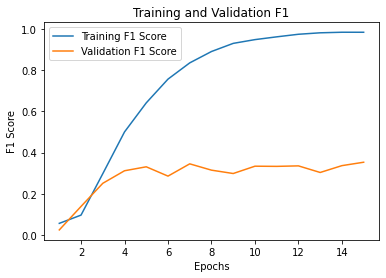

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

fit_eval_model(batch_num = 25, learning = 0.00005)

### Layer Freezing

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/15
65/65 [==============================] - 25s 216ms/step - loss: 0.4214 - accuracy: 0.8417 - precision: 0.0364 - recall: 0.0869 - custom_f1: 0.0459 - val_loss: 0.2215 - val_accuracy: 0.9474 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0245
Epoch 2/15
65/65 [==============================] - 8s 126ms/step - loss: 0.1941 - accuracy: 0.9505 - precision: 0.1111 - recall: 9.0498e-04 - custom_f1: 0.0255 - val_loss: 0.1905 - val_accuracy: 0.9478 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 3/15
65/65 [==============================] - 9s 133ms/step - loss: 0.1775 - accuracy: 0.9498 - precision: 0.0208 - recall: 4.5249e-04 - custom_f1: 0.0225 - val_loss: 0.1871 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 4/15
65/65 [==============================] - 9s 132ms/step - loss: 0.1730 - accuracy: 0.9505 - precision: 0.0714 - recall: 4.5249e-04 - custom_f1: 0.0245 - 

{'accuracy': 0.954107940196991,
 'custom_f1': 0.01393728144466877,
 'loss': 0.15459896624088287,
 'precision': 0.0,
 'recall': 0.0}

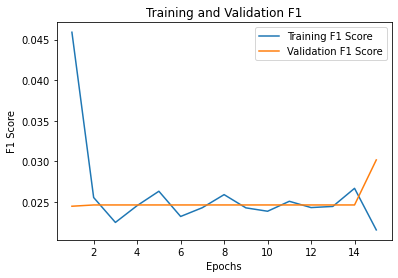

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

fit_eval_model(batch_num = 25, layers = 0, learning = 0.00005)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/15
65/65 [==============================] - 21s 191ms/step - loss: 0.2625 - accuracy: 0.9140 - precision: 0.0709 - recall: 0.0615 - custom_f1: 0.0426 - val_loss: 0.1823 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 2/15
65/65 [==============================] - 9s 142ms/step - loss: 0.1684 - accuracy: 0.9507 - precision: 0.4286 - recall: 0.0014 - custom_f1: 0.0248 - val_loss: 0.1794 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 3/15
65/65 [==============================] - 9s 143ms/step - loss: 0.1641 - accuracy: 0.9511 - precision: 0.5952 - recall: 0.0226 - custom_f1: 0.0670 - val_loss: 0.1694 - val_accuracy: 0.9479 - val_precision: 0.5417 - val_recall: 0.1331 - val_custom_f1: 0.1947
Epoch 4/15
65/65 [==============================] - 9s 143ms/step - loss: 0.1573 - accuracy: 0.9522 - precision: 0.6159 - recall: 0.0878 - custom_f1: 0.1640 - val_loss: 0.1630 - v

{'accuracy': 0.9507771730422974,
 'custom_f1': 0.2876910865306854,
 'loss': 0.16120216250419617,
 'precision': 0.4452054798603058,
 'recall': 0.2620967626571655}

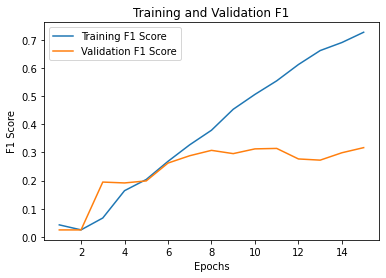

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

fit_eval_model(batch_num = 25, layers = 2, learning = 0.00005)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/50
65/65 [==============================] - 21s 189ms/step - loss: 0.2512 - accuracy: 0.9143 - precision: 0.0602 - recall: 0.0507 - custom_f1: 0.0635 - val_loss: 0.1813 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 2/50
65/65 [==============================] - 9s 143ms/step - loss: 0.1668 - accuracy: 0.9509 - precision: 0.5882 - recall: 0.0090 - custom_f1: 0.0408 - val_loss: 0.1755 - val_accuracy: 0.9492 - val_precision: 0.6154 - val_recall: 0.1092 - val_custom_f1: 0.1706
Epoch 3/50
65/65 [==============================] - 9s 143ms/step - loss: 0.1630 - accuracy: 0.9508 - precision: 0.5138 - recall: 0.0421 - custom_f1: 0.0972 - val_loss: 0.1696 - val_accuracy: 0.9504 - val_precision: 0.6724 - val_recall: 0.1331 - val_custom_f1: 0.2038
Epoch 4/50
65/65 [==============================] - 9s 143ms/step - loss: 0.1570 - accuracy: 0.9521 - precision: 0.6000 - recall: 0.1018 - custom_f1: 0.1800 - val_loss: 0.1674 - val_accur

{'accuracy': 0.9500369429588318,
 'custom_f1': 0.2818829417228699,
 'loss': 1.1627353429794312,
 'precision': 0.43624159693717957,
 'recall': 0.2620967626571655}

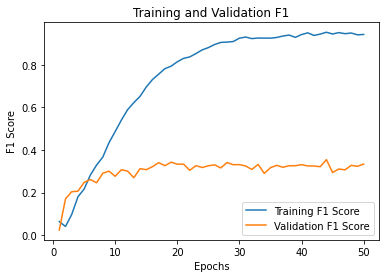

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

fit_eval_model(epoch_num = 50, batch_num = 25, layers = 2, learning = 0.00005)

### Drop Out Layer

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
def drop_create_classification_model(drop_rate = .5,
                                     hidden_size = 200, 
                                train_layers = -1, 
                                optimizer=tf.keras.optimizers.Adam()):
    """
    Build a classification model with BERT
    """

    input_ids = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='input_ids_layer')
    token_type_ids = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='token_type_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='attention_mask_layer')

    bert_inputs = {'input_ids': input_ids,
                  'token_type_ids': token_type_ids,
                  'attention_mask': attention_mask}


    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False


    bert_out = model(bert_inputs)

    hidden = tf.keras.layers.Dense(hidden_size, name='hidden_layer')(bert_out[1])

    drop = tf.keras.layers.Dropout(drop_rate)(hidden)

    classification = tf.keras.layers.Dense(28, activation='sigmoid',name='classification_layer')(drop)

    classification_model = tf.keras.Model(inputs=[input_ids, token_type_ids, attention_mask], 
                                          outputs=[classification])
    
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    
    classification_model.compile(optimizer=optimizer,
                                 loss = loss,
                                 metrics=[tf.keras.metrics.BinaryAccuracy('accuracy'), 
                                          tf.keras.metrics.Precision(), 
                                          tf.keras.metrics.Recall(), 
                                          custom_f1])


    return classification_model

In [ ]:
def drop_fit_eval_model(dropr = .5, epoch_num = 15, batch_num = 53, learning = 0.001, layers=-1):
    """
    Fit, evaulate, and plot the model's F1 scores
    """
    
    #create and fit model
    classification_model = drop_create_classification_model(drop_rate = dropr, train_layers=layers, optimizer=tf.keras.optimizers.Adam(learning))
    history = classification_model.fit([tokenize.x_train.input_ids, tokenize.x_train.token_type_ids, tokenize.x_train.attention_mask],
                         tokenize.y_train,
                         validation_data=([tokenize.x_val.input_ids, tokenize.x_val.token_type_ids, tokenize.x_val.attention_mask],
                         tokenize.y_val),
                        epochs = epoch_num,
                        batch_size = batch_num)

    #plot results
    f1_train = history.history['custom_f1']
    f1_val = history.history['val_custom_f1']
    epochs = range(1,(epoch_num + 1))
    plt.plot(epochs, f1_train, label='Training F1 Score')
    plt.plot(epochs, f1_val, label='Validation F1 Score')
    plt.title('Training and Validation F1')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()
    
    return classification_model.evaluate(x=[tokenize.x_test.input_ids, tokenize.x_test.token_type_ids, tokenize.x_test.attention_mask], y = tokenize.y_test,  return_dict=True)
    return plt   

Epoch 1/15
65/65 [==============================] - 45s 319ms/step - loss: 0.2997 - accuracy: 0.8913 - precision: 0.0881 - recall: 0.1290 - custom_f1: 0.1161 - val_loss: 0.1828 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 2/15
65/65 [==============================] - 18s 279ms/step - loss: 0.2168 - accuracy: 0.9388 - precision: 0.2101 - recall: 0.0864 - custom_f1: 0.1255 - val_loss: 0.1789 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0370
Epoch 3/15
65/65 [==============================] - 18s 280ms/step - loss: 0.2022 - accuracy: 0.9416 - precision: 0.2886 - recall: 0.1235 - custom_f1: 0.1832 - val_loss: 0.1673 - val_accuracy: 0.9504 - val_precision: 0.7234 - val_recall: 0.1160 - val_custom_f1: 0.1770
Epoch 4/15
65/65 [==============================] - 18s 273ms/step - loss: 0.1879 - accuracy: 0.9441 - precision: 0.3634 - recall: 0.1679 - custom_f1: 0.2313 - val_loss: 0.1566 

{'accuracy': 0.9507771730422974,
 'custom_f1': 0.2737066149711609,
 'loss': 0.2387942373752594,
 'precision': 0.4485294222831726,
 'recall': 0.24596774578094482}

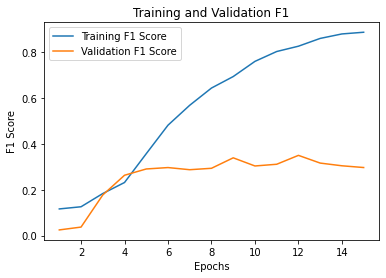

In [ ]:
drop_fit_eval_model(dropr = .5, batch_num = 25, learning = 0.00005)

Testing with higher learning rate of .001

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/15
65/65 [==============================] - 43s 394ms/step - loss: 0.2441 - accuracy: 0.9203 - precision: 0.1192 - recall: 0.0964 - custom_f1: 0.1162 - val_loss: 0.1945 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 2/15
65/65 [==============================] - 18s 276ms/step - loss: 0.2933 - accuracy: 0.9291 - precision: 0.1339 - recall: 0.0801 - custom_f1: 0.1083 - val_loss: 0.1928 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 3/15
65/65 [==============================] - 18s 273ms/step - loss: 0.1954 - accuracy: 0.9467 - precision: 0.3120 - recall: 0.0683 - custom_f1: 0.1142 - val_loss: 0.1882 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0000e+00
Epoch 4/15
65/65 [==============================] - 18s 273ms/step - loss: 0.1890 - accuracy: 0.9477 - precision: 0.3000 - recall: 0.0448 - custom_f1: 0.0863 - val_l

{'accuracy': 0.954107940196991,
 'custom_f1': 0.01393728144466877,
 'loss': 0.15759168565273285,
 'precision': 0.0,
 'recall': 0.0}

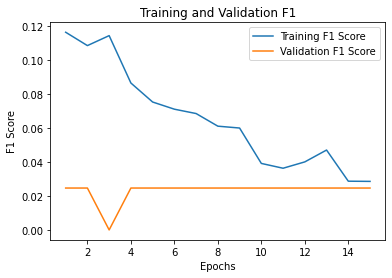

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

drop_fit_eval_model(dropr = .5, batch_num = 25)

Going back to use the learning rate of .00005 and testing with lower dropout rates

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/15
65/65 [==============================] - 36s 318ms/step - loss: 0.2557 - accuracy: 0.9167 - precision: 0.0986 - recall: 0.0846 - custom_f1: 0.0861 - val_loss: 0.1863 - val_accuracy: 0.9479 - val_precision: 0.5000 - val_recall: 0.0034 - val_custom_f1: 0.0303
Epoch 2/15
65/65 [==============================] - 18s 273ms/step - loss: 0.1788 - accuracy: 0.9488 - precision: 0.3893 - recall: 0.0661 - custom_f1: 0.1223 - val_loss: 0.1702 - val_accuracy: 0.9486 - val_precision: 0.5789 - val_recall: 0.0751 - val_custom_f1: 0.1447
Epoch 3/15
65/65 [==============================] - 18s 273ms/step - loss: 0.1593 - accuracy: 0.9512 - precision: 0.5312 - recall: 0.1656 - custom_f1: 0.2654 - val_loss: 0.1563 - val_accuracy: 0.9499 - val_precision: 0.5859 - val_recall: 0.1980 - val_custom_f1: 0.2731
Epoch 4/15
65/65 [==============================] - 18s 273ms/step - loss: 0.1343 - accuracy: 0.9563 - precision: 0.6314 - recall: 0.3054 - custom_f1: 0.4204 - val_loss: 0.1508 - val_accuracy: 

{'accuracy': 0.9476313591003418,
 'custom_f1': 0.30338695645332336,
 'loss': 0.3391904830932617,
 'precision': 0.41530054807662964,
 'recall': 0.30645161867141724}

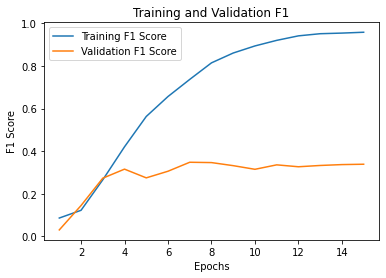

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

drop_fit_eval_model(dropr = .2, batch_num = 25, learning = 0.00005)

Testing with higher dropout to ensure we are using optimal dropout levels

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/15
65/65 [==============================] - 36s 319ms/step - loss: 0.2645 - accuracy: 0.9134 - precision: 0.0885 - recall: 0.0814 - custom_f1: 0.0877 - val_loss: 0.1848 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0000e+00
Epoch 2/15
65/65 [==============================] - 18s 284ms/step - loss: 0.1931 - accuracy: 0.9458 - precision: 0.2917 - recall: 0.0688 - custom_f1: 0.1186 - val_loss: 0.1785 - val_accuracy: 0.9494 - val_precision: 0.7083 - val_recall: 0.0580 - val_custom_f1: 0.1173
Epoch 3/15
65/65 [==============================] - 18s 279ms/step - loss: 0.1821 - accuracy: 0.9475 - precision: 0.3859 - recall: 0.1041 - custom_f1: 0.1700 - val_loss: 0.1640 - val_accuracy: 0.9502 - val_precision: 0.6393 - val_recall: 0.1331 - val_custom_f1: 0.2109
Epoch 4/15
65/65 [==============================] - 18s 273ms/step - loss: 0.1648 - accuracy: 0.9500 - precision: 0.4943 - recall: 0.1946 - custom_f1: 0.2900 - val_loss: 0.1537 - va

{'accuracy': 0.9509621858596802,
 'custom_f1': 0.30676302313804626,
 'loss': 0.24711543321609497,
 'precision': 0.4585987329483032,
 'recall': 0.29032257199287415}

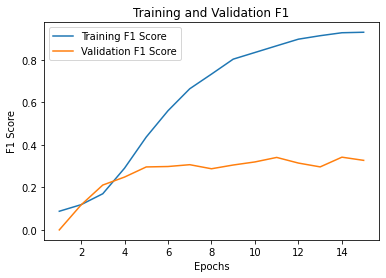

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

drop_fit_eval_model(dropr = .35, batch_num = 25, learning = 0.00005)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/15
65/65 [==============================] - 36s 319ms/step - loss: 0.2299 - accuracy: 0.9268 - precision: 0.0981 - recall: 0.0593 - custom_f1: 0.0746 - val_loss: 0.1799 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0184
Epoch 2/15
65/65 [==============================] - 18s 273ms/step - loss: 0.1641 - accuracy: 0.9507 - precision: 0.5065 - recall: 0.0882 - custom_f1: 0.1613 - val_loss: 0.1596 - val_accuracy: 0.9502 - val_precision: 0.6977 - val_recall: 0.1024 - val_custom_f1: 0.1748
Epoch 3/15
65/65 [==============================] - 18s 274ms/step - loss: 0.1439 - accuracy: 0.9530 - precision: 0.5801 - recall: 0.2032 - custom_f1: 0.3109 - val_loss: 0.1572 - val_accuracy: 0.9483 - val_precision: 0.5312 - val_recall: 0.2321 - val_custom_f1: 0.2997
Epoch 4/15
65/65 [==============================] - 18s 273ms/step - loss: 0.1164 - accuracy: 0.9601 - precision: 0.6982 - recall: 0.3643 - custom_f1: 0.4809 - val_loss: 0.1610 - val_ac

{'accuracy': 0.9500370025634766,
 'custom_f1': 0.3072313666343689,
 'loss': 0.3138316571712494,
 'precision': 0.4457831382751465,
 'recall': 0.2983871102333069}

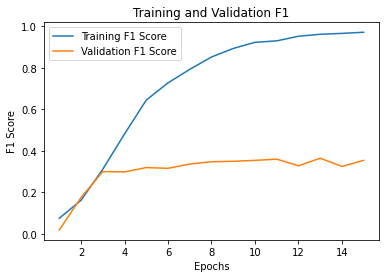

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFBertModel.from_pretrained('bert-base-uncased')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

drop_fit_eval_model(dropr = .1, batch_num = 25, learning = 0.00005)

## RoBERTa Model

In [ ]:
#roberta base cased model
from transformers import RobertaTokenizer, TFRobertaModel
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = TFRobertaModel.from_pretrained('roberta-base')

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
tokenize(tokenizer = RobertaTokenizer.from_pretrained('roberta-base'))

({'input_ids': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[    0, 48759,  3837, ...,     1,     1,     1],
        [    0, 49329,   178, ...,     1,     1,     1],
        [    0, 49329,  8487, ...,     1,     1,     1],
        ...,
        [    0, 49329,   407, ...,     1,     1,     1],
        [    0, 48759,   152, ...,     1,     1,     1],
        [    0, 49329,  8976, ...,     1,     1,     1]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>},
 array([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 {'input_ids': <tf.Tensor: shape=(193, 80), dtype=int32

In [ ]:
# x_train_rob.keys()

In [ ]:
# [x.name for x in rob_model.weights]

In [ ]:
# rob_out = rob_model(x_val, output_hidden_states=True)

In [ ]:
# len(rob_out)

In [ ]:
# rob_out[0].numpy().shape

In [ ]:
# rob_out[1].numpy().shape

In [ ]:
# len(rob_out[2])

In [ ]:
# [x.shape for x in rob_out[2]]

### Classification Model

In [ ]:
def rob_create_classification_model(hidden_size = 200, 
                                train_layers = -1, 
                                optimizer=tf.keras.optimizers.Adam()):
    """
    Build a model with RoBERTa
    """

    input_ids = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='input_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='attention_mask_layer')

    rob_inputs = {'input_ids': input_ids,
                  'attention_mask': attention_mask}


    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False


    rob_out = model(rob_inputs)
    
    hidden = tf.keras.layers.Dense(hidden_size, name='hidden_layer')(rob_out[1])

    classification = tf.keras.layers.Dense(28, activation='sigmoid',name='classification_layer')(hidden)

    classification_model = tf.keras.Model(inputs=[input_ids, attention_mask], 
                                          outputs=[classification])
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    
    classification_model.compile(optimizer=optimizer,
                                 loss = loss,
                                 metrics=[tf.keras.metrics.BinaryAccuracy('accuracy'), 
                                          tf.keras.metrics.Precision(), 
                                          tf.keras.metrics.Recall(), 
                                          custom_f1])


    return classification_model

In [ ]:
def rob_fit_eval_model(epoch_num = 15, batch_num = 53, learning = 0.001, layers=-1):
    """
    Fit, evaulate, and plot the model's F1 scores
    """
    
    #create and fit model
    classification_model = rob_create_classification_model(train_layers=layers, optimizer=tf.keras.optimizers.Adam(learning))
    history = classification_model.fit([tokenize.x_train.input_ids, tokenize.x_train.attention_mask],
                         tokenize.y_train,
                         validation_data=([tokenize.x_val.input_ids, tokenize.x_val.attention_mask],
                         tokenize.y_val),
                        epochs = epoch_num,
                        batch_size = batch_num)

    #plot results
    f1_train = history.history['custom_f1']
    f1_val = history.history['val_custom_f1']
    epochs = range(1,(epoch_num + 1))
    plt.plot(epochs, f1_train, label='Training F1 Score')
    plt.plot(epochs, f1_val, label='Validation F1 Score')
    plt.title('Training and Validation F1')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()
    
    return classification_model.evaluate(x=[tokenize.x_test.input_ids, tokenize.x_test.attention_mask], y = tokenize.y_test,  return_dict=True)
    return plt

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/15
31/31 [==============================] - 36s 606ms/step - loss: 0.2146 - accuracy: 0.9325 - precision: 0.1336 - recall: 0.0674 - custom_f1: 0.0785 - val_loss: 0.1930 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 2/15
31/31 [==============================] - 16s 509ms/step - loss: 0.1778 - accuracy: 0.9504 - precision: 0.2821 - recall: 0.0050 - custom_f1: 0.0332 - val_loss: 0.1890 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 510ms/step - loss: 0.1776 - accuracy: 0.9489 - precision: 0.3037 - recall: 0.0294 - custom_f1: 0.0545 - val_loss: 0.1893 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0000e+00
Epoch 4/15
31/31 [==============================] - 16s 509ms/step - loss: 0.1745 - accuracy: 0.9507 - precision: 0.3077 - recall: 0.0018 - custom_f1: 0.0280 - val_l

{'accuracy': 0.954107940196991,
 'custom_f1': 0.01393728144466877,
 'loss': 0.15849176049232483,
 'precision': 0.0,
 'recall': 0.0}

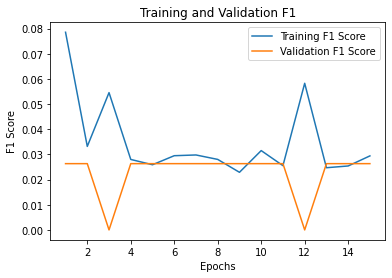

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model()

### Lower Learning Rate

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/15
31/31 [==============================] - 36s 654ms/step - loss: 0.2516 - accuracy: 0.9124 - precision: 0.0731 - recall: 0.0665 - custom_f1: 0.0394 - val_loss: 0.1847 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 2/15
31/31 [==============================] - 16s 519ms/step - loss: 0.1681 - accuracy: 0.9503 - precision: 0.3699 - recall: 0.0122 - custom_f1: 0.0401 - val_loss: 0.1791 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 510ms/step - loss: 0.1566 - accuracy: 0.9524 - precision: 0.6048 - recall: 0.1149 - custom_f1: 0.1939 - val_loss: 0.1541 - val_accuracy: 0.9524 - val_precision: 0.8039 - val_recall: 0.1399 - val_custom_f1: 0.2497
Epoch 4/15
31/31 [==============================] - 16s 510ms/step - loss: 0.1374 - accuracy: 0.9545 - precision: 0.6229 - recall: 0.2190 - custom_f1: 0.3273 - val_loss: 0.1409 

{'accuracy': 0.9522576332092285,
 'custom_f1': 0.31284549832344055,
 'loss': 0.23247365653514862,
 'precision': 0.4802631437778473,
 'recall': 0.2943548262119293}

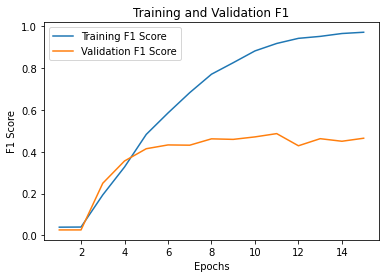

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model(learning = 0.00005)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/15
31/31 [==============================] - 41s 610ms/step - loss: 0.4914 - accuracy: 0.7804 - precision: 0.0367 - recall: 0.1371 - custom_f1: 0.0720 - val_loss: 0.2179 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0327
Epoch 2/15
31/31 [==============================] - 16s 510ms/step - loss: 0.1891 - accuracy: 0.9508 - precision: 0.5556 - recall: 0.0045 - custom_f1: 0.0340 - val_loss: 0.1833 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 511ms/step - loss: 0.1712 - accuracy: 0.9507 - precision: 0.4348 - recall: 0.0045 - custom_f1: 0.0311 - val_loss: 0.1792 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/15
31/31 [==============================] - 16s 510ms/step - loss: 0.1673 - accuracy: 0.9510 - precision: 0.6032 - recall: 0.0172 - custom_f1: 0.0569 - val_loss:

{'accuracy': 0.9541080594062805,
 'custom_f1': 0.33458784222602844,
 'loss': 0.1441684067249298,
 'precision': 0.5065789222717285,
 'recall': 0.3104838728904724}

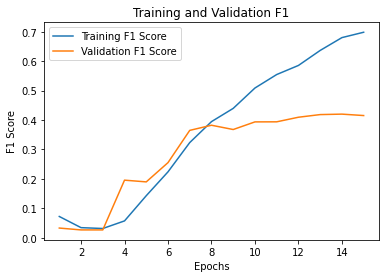

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model(learning = 0.00001)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/15
31/31 [==============================] - 35s 607ms/step - loss: 0.6251 - accuracy: 0.6599 - precision: 0.0719 - recall: 0.4950 - custom_f1: 0.1316 - val_loss: 0.3465 - val_accuracy: 0.9305 - val_precision: 0.0100 - val_recall: 0.0034 - val_custom_f1: 0.0406
Epoch 2/15
31/31 [==============================] - 16s 510ms/step - loss: 0.2455 - accuracy: 0.9489 - precision: 0.1719 - recall: 0.0100 - custom_f1: 0.0449 - val_loss: 0.1958 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 510ms/step - loss: 0.1833 - accuracy: 0.9508 - precision: 0.0000e+00 - recall: 0.0000e+00 - custom_f1: 0.0225 - val_loss: 0.1846 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/15
31/31 [==============================] - 16s 510ms/step - loss: 0.1739 - accuracy: 0.9508 - precision: 0.6000 - recall: 0.0014 - custom_f1: 0.0256 - val_loss:

{'accuracy': 0.9587343335151672,
 'custom_f1': 0.3541528284549713,
 'loss': 0.13144168257713318,
 'precision': 0.6079999804496765,
 'recall': 0.30645161867141724}

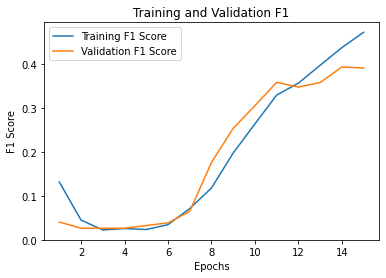

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model(learning = 0.000005)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/50
31/31 [==============================] - 36s 610ms/step - loss: 0.5982 - accuracy: 0.6944 - precision: 0.0729 - recall: 0.4434 - custom_f1: 0.1342 - val_loss: 0.3894 - val_accuracy: 0.8868 - val_precision: 0.1398 - val_recall: 0.2253 - val_custom_f1: 0.1780
Epoch 2/50
31/31 [==============================] - 16s 510ms/step - loss: 0.2768 - accuracy: 0.9385 - precision: 0.2493 - recall: 0.1204 - custom_f1: 0.1509 - val_loss: 0.1996 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/50
31/31 [==============================] - 16s 511ms/step - loss: 0.1880 - accuracy: 0.9503 - precision: 0.2982 - recall: 0.0077 - custom_f1: 0.0372 - val_loss: 0.1856 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/50
31/31 [==============================] - 16s 509ms/step - loss: 0.1751 - accuracy: 0.9507 - precision: 0.4444 - recall: 0.0036 - custom_f1: 0.0291 - val_loss: 0.1828 

{'accuracy': 0.9507772922515869,
 'custom_f1': 0.32382914423942566,
 'loss': 0.18189875781536102,
 'precision': 0.4588235318660736,
 'recall': 0.3145161271095276}

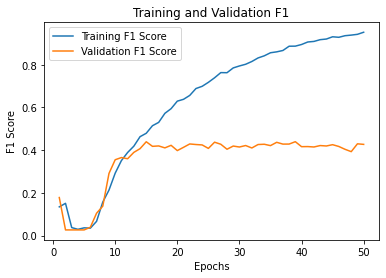

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model(epoch_num = 50, learning = 0.000005)

### Batch Sizes

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/15
17/17 [==============================] - 34s 1s/step - loss: 0.6680 - accuracy: 0.5723 - precision: 0.0667 - recall: 0.5910 - custom_f1: 0.1255 - val_loss: 0.6044 - val_accuracy: 0.7319 - val_precision: 0.0614 - val_recall: 0.2901 - val_custom_f1: 0.1492
Epoch 2/15
17/17 [==============================] - 15s 889ms/step - loss: 0.4801 - accuracy: 0.8616 - precision: 0.0710 - recall: 0.1498 - custom_f1: 0.0927 - val_loss: 0.2972 - val_accuracy: 0.9476 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0273
Epoch 3/15
17/17 [==============================] - 15s 887ms/step - loss: 0.2544 - accuracy: 0.9505 - precision: 0.1765 - recall: 0.0014 - custom_f1: 0.0278 - val_loss: 0.2068 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0184
Epoch 4/15
17/17 [==============================] - 15s 887ms/step - loss: 0.1965 - accuracy: 0.9508 - precision: 0.5294 - recall: 0.0041 - custom_f1: 0.0286 - val_loss: 0.1913 - v

{'accuracy': 0.9576238989830017,
 'custom_f1': 0.24281011521816254,
 'loss': 0.14531292021274567,
 'precision': 0.6521739363670349,
 'recall': 0.18145161867141724}

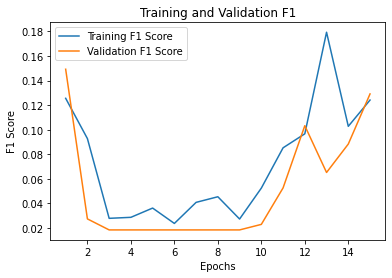

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model(batch_num = 100, learning = 0.000005)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/50
17/17 [==============================] - 39s 1s/step - loss: 0.6678 - accuracy: 0.5947 - precision: 0.0403 - recall: 0.3167 - custom_f1: 0.0747 - val_loss: 0.5777 - val_accuracy: 0.7258 - val_precision: 0.0472 - val_recall: 0.2218 - val_custom_f1: 0.0587
Epoch 2/50
17/17 [==============================] - 15s 889ms/step - loss: 0.4281 - accuracy: 0.8736 - precision: 0.0649 - recall: 0.1167 - custom_f1: 0.0923 - val_loss: 0.2526 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0321
Epoch 3/50
17/17 [==============================] - 15s 887ms/step - loss: 0.2236 - accuracy: 0.9507 - precision: 0.3000 - recall: 0.0014 - custom_f1: 0.0265 - val_loss: 0.1970 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0184
Epoch 4/50
17/17 [==============================] - 15s 889ms/step - loss: 0.1866 - accuracy: 0.9508 - precision: 0.0000e+00 - recall: 0.0000e+00 - custom_f1: 0.0224 - val_loss: 0.

{'accuracy': 0.9555884599685669,
 'custom_f1': 0.35029253363609314,
 'loss': 0.13864848017692566,
 'precision': 0.5347222089767456,
 'recall': 0.3104838728904724}

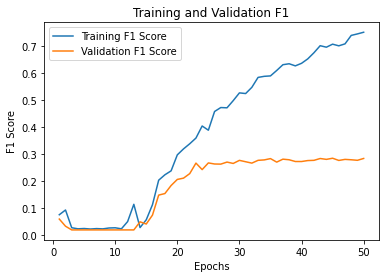

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model(epoch_num = 50, batch_num = 100, learning = 0.000005)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/15
65/65 [==============================] - 37s 325ms/step - loss: 0.4414 - accuracy: 0.7993 - precision: 0.0735 - recall: 0.2647 - custom_f1: 0.0801 - val_loss: 0.1926 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 2/15
65/65 [==============================] - 18s 278ms/step - loss: 0.1793 - accuracy: 0.9509 - precision: 0.7778 - recall: 0.0032 - custom_f1: 0.0299 - val_loss: 0.1832 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 3/15
65/65 [==============================] - 18s 277ms/step - loss: 0.1703 - accuracy: 0.9507 - precision: 0.3333 - recall: 0.0014 - custom_f1: 0.0252 - val_loss: 0.1803 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 4/15
65/65 [==============================] - 18s 277ms/step - loss: 0.1665 - accuracy: 0.9508 - precision: 0.5510 - recall: 0.0122 - custom_f1: 0.0414 - val_loss:

{'accuracy': 0.9579941630363464,
 'custom_f1': 0.37347960472106934,
 'loss': 0.13541589677333832,
 'precision': 0.5771812200546265,
 'recall': 0.3467741906642914}

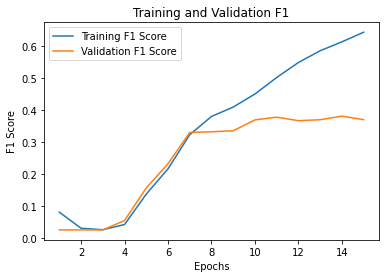

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model(batch_num = 25, learning = 0.000005)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/50
65/65 [==============================] - 37s 323ms/step - loss: 0.4135 - accuracy: 0.8594 - precision: 0.0331 - recall: 0.0656 - custom_f1: 0.0658 - val_loss: 0.2013 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 2/50
65/65 [==============================] - 18s 277ms/step - loss: 0.1861 - accuracy: 0.9508 - precision: 0.5000 - recall: 0.0023 - custom_f1: 0.0337 - val_loss: 0.1846 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 3/50
65/65 [==============================] - 18s 277ms/step - loss: 0.1723 - accuracy: 0.9508 - precision: 0.5714 - recall: 0.0036 - custom_f1: 0.0291 - val_loss: 0.1810 - val_accuracy: 0.9483 - val_precision: 1.0000 - val_recall: 0.0068 - val_custom_f1: 0.0363
Epoch 4/50
65/65 [==============================] - 18s 277ms/step - loss: 0.1676 - accuracy: 0.9510 - precision: 0.6410 - recall: 0.0113 - custom_f1: 0.0425 - val_loss: 0.1755 

{'accuracy': 0.9518874287605286,
 'custom_f1': 0.3520187437534332,
 'loss': 0.23420938849449158,
 'precision': 0.4754098355770111,
 'recall': 0.35080644488334656}

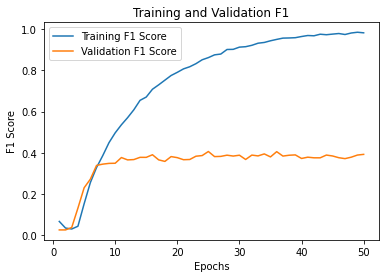

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model(epoch_num = 50, batch_num = 25, learning = 0.000005)

### Layer Freezing

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/15
31/31 [==============================] - 19s 338ms/step - loss: 0.6616 - accuracy: 0.6187 - precision: 0.0269 - recall: 0.1914 - custom_f1: 0.0533 - val_loss: 0.6454 - val_accuracy: 0.7077 - val_precision: 0.0396 - val_recall: 0.1980 - val_custom_f1: 0.0776
Epoch 2/15
31/31 [==============================] - 6s 209ms/step - loss: 0.6320 - accuracy: 0.7305 - precision: 0.0251 - recall: 0.1181 - custom_f1: 0.0474 - val_loss: 0.6187 - val_accuracy: 0.7765 - val_precision: 0.0330 - val_recall: 0.1160 - val_custom_f1: 0.0676
Epoch 3/15
31/31 [==============================] - 6s 209ms/step - loss: 0.6053 - accuracy: 0.8127 - precision: 0.0210 - recall: 0.0615 - custom_f1: 0.0429 - val_loss: 0.5939 - val_accuracy: 0.8459 - val_precision: 0.0327 - val_recall: 0.0683 - val_custom_f1: 0.0677
Epoch 4/15
31/31 [==============================] - 6s 210ms/step - loss: 0.5791 - accuracy: 0.8522 - precision: 0.0191 - recall: 0.0398 - custom_f1: 0.0416 - val_loss: 0.5704 - val_accuracy: 0.8

{'accuracy': 0.954107940196991,
 'custom_f1': 0.027226317673921585,
 'loss': 0.3745504915714264,
 'precision': 0.0,
 'recall': 0.0}

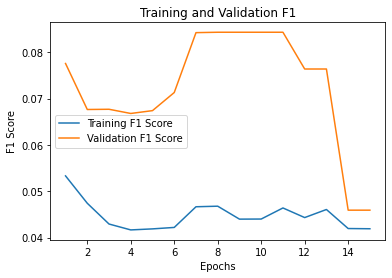

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model(layers = 0, learning = 0.000005)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/15
31/31 [==============================] - 19s 350ms/step - loss: 0.6402 - accuracy: 0.6524 - precision: 0.0419 - recall: 0.2774 - custom_f1: 0.0781 - val_loss: 0.5954 - val_accuracy: 0.7667 - val_precision: 0.0372 - val_recall: 0.1399 - val_custom_f1: 0.0763
Epoch 2/15
31/31 [==============================] - 8s 254ms/step - loss: 0.5202 - accuracy: 0.8360 - precision: 0.0419 - recall: 0.1068 - custom_f1: 0.0784 - val_loss: 0.4437 - val_accuracy: 0.9183 - val_precision: 0.1010 - val_recall: 0.0717 - val_custom_f1: 0.1259
Epoch 3/15
31/31 [==============================] - 8s 255ms/step - loss: 0.3452 - accuracy: 0.9279 - precision: 0.0908 - recall: 0.0516 - custom_f1: 0.0873 - val_loss: 0.2570 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0343
Epoch 4/15
31/31 [==============================] - 8s 256ms/step - loss: 0.2425 - accuracy: 0.9505 - precision: 0.2174 - recall: 0.0023 - custom_f1: 0.0317 - val_loss: 0.2120 - val_accur

{'accuracy': 0.954107940196991,
 'custom_f1': 0.01393728144466877,
 'loss': 0.1536542922258377,
 'precision': 0.0,
 'recall': 0.0}

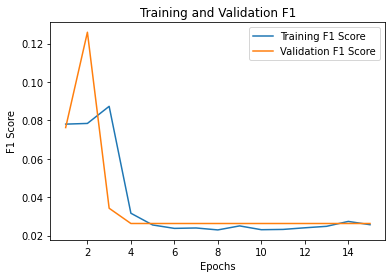

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model(layers = 2, learning = 0.000005)

### Drop Out Layer

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [ ]:
def rob_drop_create_classification_model(drop_rate = .5,
                                     hidden_size = 200, 
                                train_layers = -1, 
                                optimizer=tf.keras.optimizers.Adam()):
    """
    Build a classification model with BERT
    """

    input_ids = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='input_ids_layer')
    attention_mask = tf.keras.layers.Input(shape=(tokenize.max_length,), dtype=tf.int32, name='attention_mask_layer')

    rob_inputs = {'input_ids': input_ids,
              'attention_mask': attention_mask}


    #restrict training to the train_layers outer transformer layers
    if not train_layers == -1:

            retrain_layers = []

            for retrain_layer_number in range(train_layers):

                layer_code = '_' + str(11 - retrain_layer_number)
                retrain_layers.append(layer_code)

            for w in model.weights:
                if not any([x in w.name for x in retrain_layers]):
                    w._trainable = False


    rob_out = model(rob_inputs)

    hidden = tf.keras.layers.Dense(hidden_size, name='hidden_layer')(rob_out[1])

    drop = tf.keras.layers.Dropout(drop_rate)(hidden)

    classification = tf.keras.layers.Dense(28, activation='sigmoid',name='classification_layer')(drop)

    classification_model = tf.keras.Model(inputs=[input_ids, attention_mask], 
                                          outputs=[classification])
    
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)
    
    classification_model.compile(optimizer=optimizer,
                                 loss = loss,
                                 metrics=[tf.keras.metrics.BinaryAccuracy('accuracy'), 
                                          tf.keras.metrics.Precision(), 
                                          tf.keras.metrics.Recall(), 
                                          custom_f1])


    return classification_model

In [ ]:
def rob_drop_fit_eval_model(dropr = .5, epoch_num = 15, batch_num = 53, learning = 0.001, layers=-1):
    """
    Fit, evaulate, and plot the model's F1 scores
    """
    
    #create and fit model
    classification_model = rob_drop_create_classification_model(drop_rate = dropr, train_layers=layers, optimizer=tf.keras.optimizers.Adam(learning))
    history = classification_model.fit([tokenize.x_train.input_ids, tokenize.x_train.attention_mask],
                         tokenize.y_train,
                         validation_data=([tokenize.x_val.input_ids, tokenize.x_val.attention_mask],
                         tokenize.y_val),
                        epochs = epoch_num,
                        batch_size = batch_num)

    #plot results
    f1_train = history.history['custom_f1']
    f1_val = history.history['val_custom_f1']
    epochs = range(1,(epoch_num + 1))
    plt.plot(epochs, f1_train, label='Training F1 Score')
    plt.plot(epochs, f1_val, label='Validation F1 Score')
    plt.title('Training and Validation F1')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()
    
    return classification_model.evaluate(x=[tokenize.x_test.input_ids, tokenize.x_test.attention_mask], y = tokenize.y_test,  return_dict=True)
    return plt

Epoch 1/15
31/31 [==============================] - 34s 618ms/step - loss: 0.6320 - accuracy: 0.6400 - precision: 0.0562 - recall: 0.3995 - custom_f1: 0.1040 - val_loss: 0.4014 - val_accuracy: 0.9197 - val_precision: 0.0062 - val_recall: 0.0034 - val_custom_f1: 0.0596
Epoch 2/15
31/31 [==============================] - 16s 511ms/step - loss: 0.3471 - accuracy: 0.8903 - precision: 0.0847 - recall: 0.1249 - custom_f1: 0.1071 - val_loss: 0.2108 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 509ms/step - loss: 0.2582 - accuracy: 0.9288 - precision: 0.1572 - recall: 0.1014 - custom_f1: 0.1308 - val_loss: 0.1918 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/15
31/31 [==============================] - 16s 510ms/step - loss: 0.2356 - accuracy: 0.9342 - precision: 0.1835 - recall: 0.0964 - custom_f1: 0.1343 - val_loss: 0.1873 

{'accuracy': 0.9574388861656189,
 'custom_f1': 0.3199310898780823,
 'loss': 0.13679812848567963,
 'precision': 0.5862069129943848,
 'recall': 0.27419355511665344}

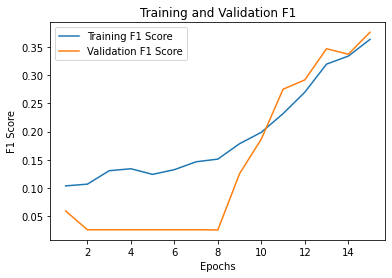

In [ ]:
rob_drop_fit_eval_model(dropr = .5, learning = 0.000005)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/50
31/31 [==============================] - 34s 605ms/step - loss: 0.6203 - accuracy: 0.6550 - precision: 0.0517 - recall: 0.3457 - custom_f1: 0.0962 - val_loss: 0.3361 - val_accuracy: 0.9478 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0211
Epoch 2/50
31/31 [==============================] - 16s 509ms/step - loss: 0.3120 - accuracy: 0.9068 - precision: 0.0840 - recall: 0.0900 - custom_f1: 0.0904 - val_loss: 0.2078 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0000e+00
Epoch 3/50
31/31 [==============================] - 16s 509ms/step - loss: 0.2507 - accuracy: 0.9315 - precision: 0.1419 - recall: 0.0769 - custom_f1: 0.1098 - val_loss: 0.1946 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/50
31/31 [==============================] - 16s 509ms/step - loss: 0.2366 - accuracy: 0.9364 - precision: 0.1875 - recall: 0.0869 - custom_f1: 0.1243 - val_l

{'accuracy': 0.9546632170677185,
 'custom_f1': 0.34682753682136536,
 'loss': 0.15591146051883698,
 'precision': 0.5228758454322815,
 'recall': 0.32258063554763794}

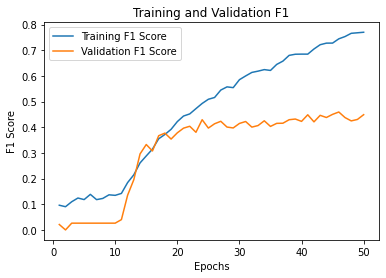

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_drop_fit_eval_model(epoch_num = 50, dropr = .5, learning = 0.000005)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/15
31/31 [==============================] - 35s 612ms/step - loss: 0.6891 - accuracy: 0.5554 - precision: 0.0619 - recall: 0.5665 - custom_f1: 0.1119 - val_loss: 0.4270 - val_accuracy: 0.9476 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0603
Epoch 2/15
31/31 [==============================] - 16s 508ms/step - loss: 0.3210 - accuracy: 0.9216 - precision: 0.1063 - recall: 0.0796 - custom_f1: 0.1087 - val_loss: 0.2062 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 509ms/step - loss: 0.2283 - accuracy: 0.9423 - precision: 0.2134 - recall: 0.0633 - custom_f1: 0.1103 - val_loss: 0.1892 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/15
31/31 [==============================] - 16s 509ms/step - loss: 0.2094 - accuracy: 0.9461 - precision: 0.3062 - recall: 0.0733 - custom_f1: 0.1322 - val_loss:

{'accuracy': 0.9570688605308533,
 'custom_f1': 0.3182081878185272,
 'loss': 0.1365915685892105,
 'precision': 0.5789473652839661,
 'recall': 0.2661290466785431}

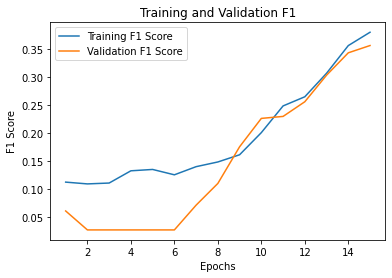

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_drop_fit_eval_model(dropr = .35, learning = 0.000005)

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_drop_fit_eval_model(epoch_num = 50, dropr = .35, learning = 0.000005)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/15
31/31 [==============================] - 37s 667ms/step - loss: 0.5953 - accuracy: 0.6996 - precision: 0.0636 - recall: 0.3710 - custom_f1: 0.1140 - val_loss: 0.3201 - val_accuracy: 0.9478 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0630
Epoch 2/15
31/31 [==============================] - 16s 510ms/step - loss: 0.2646 - accuracy: 0.9452 - precision: 0.2510 - recall: 0.0566 - custom_f1: 0.1093 - val_loss: 0.2017 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 509ms/step - loss: 0.2058 - accuracy: 0.9486 - precision: 0.3248 - recall: 0.0403 - custom_f1: 0.0878 - val_loss: 0.1884 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/15
31/31 [==============================] - 16s 509ms/step - loss: 0.1925 - accuracy: 0.9493 - precision: 0.3755 - recall: 0.0416 - custom_f1: 0.0820 - val_loss:

{'accuracy': 0.9589192867279053,
 'custom_f1': 0.3182823657989502,
 'loss': 0.13080553710460663,
 'precision': 0.6399999856948853,
 'recall': 0.25806450843811035}

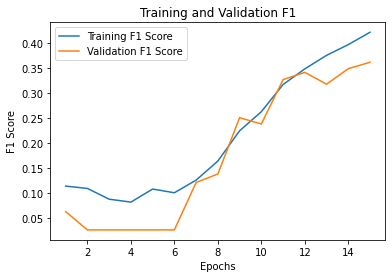

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_drop_fit_eval_model(dropr = .2, learning = 0.000005)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/15
31/31 [==============================] - 35s 608ms/step - loss: 0.6026 - accuracy: 0.6749 - precision: 0.0567 - recall: 0.3579 - custom_f1: 0.1156 - val_loss: 0.3058 - val_accuracy: 0.9426 - val_precision: 0.2712 - val_recall: 0.0546 - val_custom_f1: 0.1279
Epoch 2/15
31/31 [==============================] - 16s 510ms/step - loss: 0.2448 - accuracy: 0.9478 - precision: 0.2767 - recall: 0.0376 - custom_f1: 0.0831 - val_loss: 0.1936 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 509ms/step - loss: 0.1912 - accuracy: 0.9497 - precision: 0.3333 - recall: 0.0226 - custom_f1: 0.0615 - val_loss: 0.1848 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/15
31/31 [==============================] - 16s 510ms/step - loss: 0.1809 - accuracy: 0.9499 - precision: 0.3488 - recall: 0.0204 - custom_f1: 0.0531 - val_loss: 0.1824 

{'accuracy': 0.9578091502189636,
 'custom_f1': 0.3196246027946472,
 'loss': 0.13390721380710602,
 'precision': 0.6017699241638184,
 'recall': 0.27419355511665344}

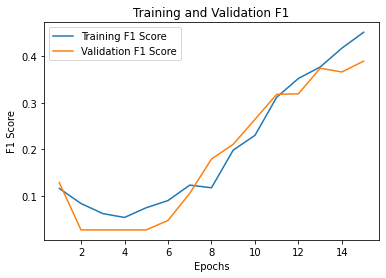

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_drop_fit_eval_model(dropr = .1, learning = 0.000005)

Some layers from the model checkpoint at roberta-base were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFRobertaModel were initialized from the model checkpoint at roberta-base.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaModel for predictions without further training.


Epoch 1/50
31/31 [==============================] - 35s 619ms/step - loss: 0.6090 - accuracy: 0.7137 - precision: 0.0816 - recall: 0.4683 - custom_f1: 0.1498 - val_loss: 0.3315 - val_accuracy: 0.9472 - val_precision: 0.3571 - val_recall: 0.0171 - val_custom_f1: 0.0695
Epoch 2/50
31/31 [==============================] - 16s 509ms/step - loss: 0.2505 - accuracy: 0.9472 - precision: 0.2384 - recall: 0.0326 - custom_f1: 0.0745 - val_loss: 0.1936 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/50
31/31 [==============================] - 16s 509ms/step - loss: 0.1873 - accuracy: 0.9497 - precision: 0.3756 - recall: 0.0335 - custom_f1: 0.0773 - val_loss: 0.1842 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/50
31/31 [==============================] - 16s 510ms/step - loss: 0.1793 - accuracy: 0.9499 - precision: 0.3978 - recall: 0.0335 - custom_f1: 0.0766 - val_loss: 0.1815 

{'accuracy': 0.9511472582817078,
 'custom_f1': 0.3216010630130768,
 'loss': 0.18871979415416718,
 'precision': 0.4593023359775543,
 'recall': 0.31854838132858276}

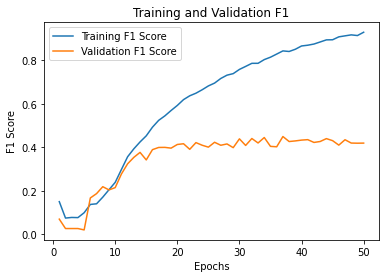

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()
model = TFRobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

rob_drop_fit_eval_model(epoch_num = 50, dropr = .1, learning = 0.000005)

## BERT MLM Model

In [ ]:
#bert mlm model
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/bert_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/bert_pretrained_500000_10epoch were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/bert_pretrained_500000_10epoch and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

In [ ]:
tokenize(tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased'))

({'input_ids': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[ 101, 1031, 1005, ...,    0,    0,    0],
        [ 101, 1031, 1000, ...,    0,    0,    0],
        [ 101, 1031, 1000, ...,    0,    0,    0],
        ...,
        [ 101, 1031, 1000, ...,    0,    0,    0],
        [ 101, 1031, 1005, ...,    0,    0,    0],
        [ 101, 1031, 1000, ...,    0,    0,    0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>},
 array([[

Epoch 1/15
65/65 [==============================] - 37s 320ms/step - loss: 0.1959 - accuracy: 0.9422 - precision: 0.0697 - recall: 0.0140 - custom_f1: 0.0345 - val_loss: 0.1824 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 2/15
65/65 [==============================] - 18s 274ms/step - loss: 0.1600 - accuracy: 0.9515 - precision: 0.5810 - recall: 0.0665 - custom_f1: 0.1293 - val_loss: 0.1627 - val_accuracy: 0.9504 - val_precision: 0.8148 - val_recall: 0.0751 - val_custom_f1: 0.1396
Epoch 3/15
65/65 [==============================] - 18s 274ms/step - loss: 0.1341 - accuracy: 0.9555 - precision: 0.6595 - recall: 0.2235 - custom_f1: 0.3407 - val_loss: 0.1467 - val_accuracy: 0.9494 - val_precision: 0.5517 - val_recall: 0.2184 - val_custom_f1: 0.3011
Epoch 4/15
65/65 [==============================] - 18s 274ms/step - loss: 0.0959 - accuracy: 0.9659 - precision: 0.7935 - recall: 0.4416 - custom_f1: 0.5674 - val_loss: 0.1556 - val_ac

{'accuracy': 0.9472613334655762,
 'custom_f1': 0.2712455689907074,
 'loss': 0.41054797172546387,
 'precision': 0.3987730145454407,
 'recall': 0.2620967626571655}

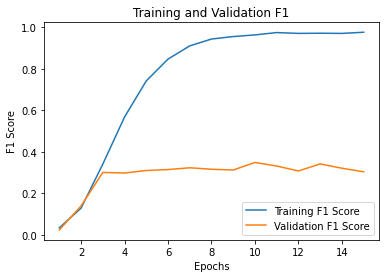

In [ ]:
fit_eval_model(batch_num = 25, learning = 0.00005)

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/bert_pretrained_500000_10epoch were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/bert_pretrained_500000_10epoch and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
65/65 [==============================] - 36s 319ms/step - loss: 0.2049 - accuracy: 0.9421 - precision: 0.1620 - recall: 0.0421 - custom_f1: 0.0853 - val_loss: 0.1823 - val_accuracy: 0.9478 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0245
Epoch 2/15
65/65 [==============================] - 18s 273ms/step - loss: 0.1625 - accuracy: 0.9501 - precision: 0.4780 - recall: 0.0932 - custom_f1: 0.1623 - val_loss: 0.1555 - val_accuracy: 0.9488 - val_precision: 0.5588 - val_recall: 0.1945 - val_custom_f1: 0.2641
Epoch 3/15
65/65 [==============================] - 18s 274ms/step - loss: 0.1307 - accuracy: 0.9559 - precision: 0.6406 - recall: 0.2710 - custom_f1: 0.3774 - val_loss: 0.1550 - val_accuracy: 0.9485 - val_precision: 0.5344 - val_recall: 0.2389 - val_custom_f1: 0.3081
Epoch 4/15
65/65 [==============================] - 18s 273ms/step - loss: 0.0967 - accuracy: 0.9658 - precision: 0.7725 - recall: 0.4624 - custom_f1: 0.5794 - val_loss: 0.1583 - val_ac

{'accuracy': 0.9472612738609314,
 'custom_f1': 0.277233749628067,
 'loss': 0.31858551502227783,
 'precision': 0.401197612285614,
 'recall': 0.27016130089759827}

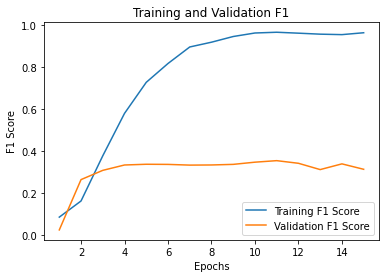

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/bert_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

drop_fit_eval_model(dropr = .1, batch_num = 25, learning = 0.00005)

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/bert_pretrained_500000_10epoch were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/bert_pretrained_500000_10epoch and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
31/31 [==============================] - 36s 620ms/step - loss: 0.2332 - accuracy: 0.9303 - precision: 0.0455 - recall: 0.0208 - custom_f1: 0.0287 - val_loss: 0.1833 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 2/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1685 - accuracy: 0.9509 - precision: 1.0000 - recall: 0.0014 - custom_f1: 0.0279 - val_loss: 0.1799 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1591 - accuracy: 0.9517 - precision: 0.6059 - recall: 0.0647 - custom_f1: 0.1313 - val_loss: 0.1588 - val_accuracy: 0.9494 - val_precision: 0.6102 - val_recall: 0.1229 - val_custom_f1: 0.2152
Epoch 4/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1350 - accuracy: 0.9560 - precision: 0.6692 - recall: 0.2362 - custom_f1: 0.3540 - val_loss: 0.1481 

{'accuracy': 0.9489266276359558,
 'custom_f1': 0.26707735657691956,
 'loss': 0.2673984169960022,
 'precision': 0.4161073863506317,
 'recall': 0.25}

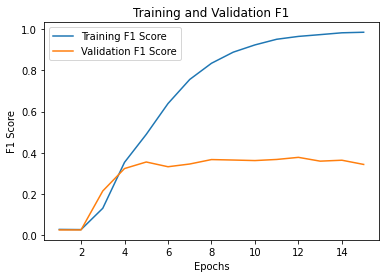

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/bert_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

fit_eval_model(learning = 0.00005)

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/bert_pretrained_500000_10epoch were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/bert_pretrained_500000_10epoch and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
31/31 [==============================] - 35s 606ms/step - loss: 0.2251 - accuracy: 0.9332 - precision: 0.0938 - recall: 0.0412 - custom_f1: 0.0715 - val_loss: 0.1850 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 2/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1708 - accuracy: 0.9493 - precision: 0.3797 - recall: 0.0457 - custom_f1: 0.0938 - val_loss: 0.1694 - val_accuracy: 0.9483 - val_precision: 0.6154 - val_recall: 0.0273 - val_custom_f1: 0.0775
Epoch 3/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1529 - accuracy: 0.9513 - precision: 0.5360 - recall: 0.1348 - custom_f1: 0.2208 - val_loss: 0.1564 - val_accuracy: 0.9495 - val_precision: 0.6000 - val_recall: 0.1741 - val_custom_f1: 0.2702
Epoch 4/15
31/31 [==============================] - 16s 507ms/step - loss: 0.1259 - accuracy: 0.9580 - precision: 0.6979 - recall: 0.2896 - custom_f1: 0.4113 - val_loss: 0.1492 - val_ac

{'accuracy': 0.9483715891838074,
 'custom_f1': 0.27353769540786743,
 'loss': 0.25492608547210693,
 'precision': 0.40909090638160706,
 'recall': 0.2540322542190552}

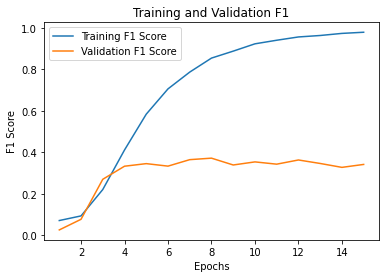

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/bert_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

drop_fit_eval_model(dropr = .1, learning = 0.00005)

## RoBERTa MLM Model

In [ ]:
#roberta mlm model
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFRobertaModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch and are newly initialized: ['roberta/pooler/dense/kernel:0', 'roberta/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

In [ ]:
tokenize(tokenizer = AutoTokenizer.from_pretrained('roberta-base'))

({'input_ids': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[    0, 48759,  3837, ...,     1,     1,     1],
        [    0, 49329,   178, ...,     1,     1,     1],
        [    0, 49329,  8487, ...,     1,     1,     1],
        ...,
        [    0, 49329,   407, ...,     1,     1,     1],
        [    0, 48759,   152, ...,     1,     1,     1],
        [    0, 49329,  8976, ...,     1,     1,     1]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>},
 array([[0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 1],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 {'input_ids': <tf.Tensor: shape=(193, 80), dtype=int32

Epoch 1/15
65/65 [==============================] - 39s 333ms/step - loss: 0.3936 - accuracy: 0.8530 - precision: 0.0718 - recall: 0.1661 - custom_f1: 0.0858 - val_loss: 0.1938 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 2/15
65/65 [==============================] - 18s 277ms/step - loss: 0.1793 - accuracy: 0.9507 - precision: 0.1429 - recall: 4.5249e-04 - custom_f1: 0.0244 - val_loss: 0.1833 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 3/15
65/65 [==============================] - 18s 277ms/step - loss: 0.1711 - accuracy: 0.9507 - precision: 0.4444 - recall: 0.0018 - custom_f1: 0.0260 - val_loss: 0.1806 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 4/15
65/65 [==============================] - 18s 277ms/step - loss: 0.1681 - accuracy: 0.9510 - precision: 0.5667 - recall: 0.0154 - custom_f1: 0.0502 - val_l

{'accuracy': 0.9587343335151672,
 'custom_f1': 0.3472660183906555,
 'loss': 0.12943033874034882,
 'precision': 0.6147540807723999,
 'recall': 0.30241936445236206}

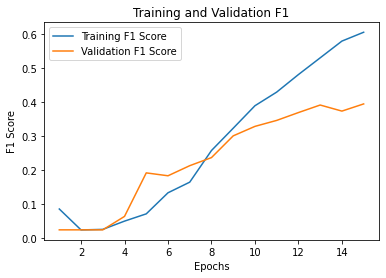

In [ ]:
rob_fit_eval_model(batch_num = 25, learning = 0.000005)

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFRobertaModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch and are newly initialized: ['roberta/pooler/dense/kernel:0', 'roberta/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/50
65/65 [==============================] - 38s 326ms/step - loss: 0.4210 - accuracy: 0.8270 - precision: 0.0873 - recall: 0.2652 - custom_f1: 0.1727 - val_loss: 0.2037 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 2/50
65/65 [==============================] - 18s 277ms/step - loss: 0.1861 - accuracy: 0.9507 - precision: 0.4912 - recall: 0.0127 - custom_f1: 0.0443 - val_loss: 0.1840 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0246
Epoch 3/50
65/65 [==============================] - 18s 278ms/step - loss: 0.1724 - accuracy: 0.9509 - precision: 0.6250 - recall: 0.0113 - custom_f1: 0.0407 - val_loss: 0.1802 - val_accuracy: 0.9481 - val_precision: 0.5517 - val_recall: 0.0546 - val_custom_f1: 0.0985
Epoch 4/50
65/65 [==============================] - 18s 278ms/step - loss: 0.1679 - accuracy: 0.9510 - precision: 0.5375 - recall: 0.0584 - custom_f1: 0.1076 - val_loss: 0.1771 

{'accuracy': 0.9535529613494873,
 'custom_f1': 0.3523705303668976,
 'loss': 0.21043691039085388,
 'precision': 0.5,
 'recall': 0.3467741906642914}

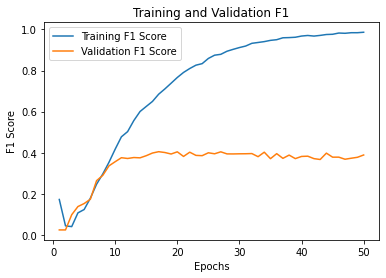

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model(epoch_num = 50, batch_num = 25, learning = 0.000005)

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFRobertaModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch and are newly initialized: ['roberta/pooler/dense/kernel:0', 'roberta/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
31/31 [==============================] - 77s 623ms/step - loss: 0.5178 - accuracy: 0.7631 - precision: 0.0838 - recall: 0.3824 - custom_f1: 0.1342 - val_loss: 0.2861 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0565
Epoch 2/15
31/31 [==============================] - 16s 510ms/step - loss: 0.2358 - accuracy: 0.9504 - precision: 0.3111 - recall: 0.0063 - custom_f1: 0.0368 - val_loss: 0.2003 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 511ms/step - loss: 0.1901 - accuracy: 0.9507 - precision: 0.2500 - recall: 9.0498e-04 - custom_f1: 0.0269 - val_loss: 0.1878 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/15
31/31 [==============================] - 16s 510ms/step - loss: 0.1780 - accuracy: 0.9507 - precision: 0.4286 - recall: 0.0027 - custom_f1: 0.0270 - val_l

{'accuracy': 0.9585491418838501,
 'custom_f1': 0.2924274802207947,
 'loss': 0.1302303820848465,
 'precision': 0.644444465637207,
 'recall': 0.2338709682226181}

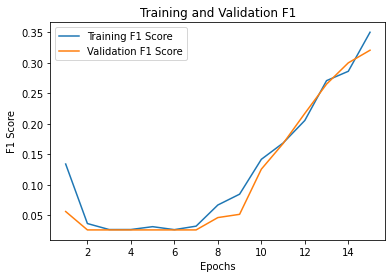

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

rob_fit_eval_model(learning = 0.000005)

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFRobertaModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch and are newly initialized: ['roberta/pooler/dense/kernel:0', 'roberta/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
31/31 [==============================] - 36s 638ms/step - loss: 0.5412 - accuracy: 0.7456 - precision: 0.0692 - recall: 0.3344 - custom_f1: 0.1380 - val_loss: 0.3204 - val_accuracy: 0.9264 - val_precision: 0.2552 - val_recall: 0.2082 - val_custom_f1: 0.2471
Epoch 2/15
31/31 [==============================] - 16s 511ms/step - loss: 0.2585 - accuracy: 0.9442 - precision: 0.2937 - recall: 0.0928 - custom_f1: 0.1440 - val_loss: 0.2043 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/15
31/31 [==============================] - 16s 509ms/step - loss: 0.2014 - accuracy: 0.9497 - precision: 0.4010 - recall: 0.0367 - custom_f1: 0.0798 - val_loss: 0.1902 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/15
31/31 [==============================] - 16s 510ms/step - loss: 0.1874 - accuracy: 0.9500 - precision: 0.3987 - recall: 0.0285 - custom_f1: 0.0682 - val_loss: 0.1852 

{'accuracy': 0.9596594572067261,
 'custom_f1': 0.31486573815345764,
 'loss': 0.13397319614887238,
 'precision': 0.6702127456665039,
 'recall': 0.2540322542190552}

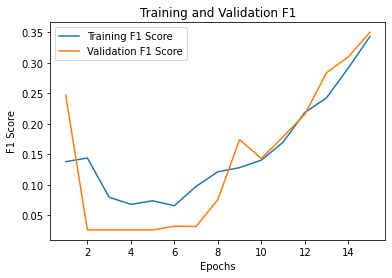

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

rob_drop_fit_eval_model(dropr = .1, learning = 0.000005)

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch were not used when initializing TFRobertaModel: ['lm_head']
- This IS expected if you are initializing TFRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFRobertaModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch and are newly initialized: ['roberta/pooler/dense/kernel:0', 'roberta/pooler/dense/bias:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/50
31/31 [==============================] - 35s 625ms/step - loss: 0.5785 - accuracy: 0.7402 - precision: 0.0573 - recall: 0.2765 - custom_f1: 0.1046 - val_loss: 0.3205 - val_accuracy: 0.9423 - val_precision: 0.1190 - val_recall: 0.0171 - val_custom_f1: 0.0760
Epoch 2/50
31/31 [==============================] - 16s 510ms/step - loss: 0.2696 - accuracy: 0.9456 - precision: 0.1151 - recall: 0.0158 - custom_f1: 0.0488 - val_loss: 0.2068 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 3/50
31/31 [==============================] - 16s 511ms/step - loss: 0.2017 - accuracy: 0.9505 - precision: 0.4222 - recall: 0.0172 - custom_f1: 0.0585 - val_loss: 0.1894 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 4/50
31/31 [==============================] - 16s 514ms/step - loss: 0.1866 - accuracy: 0.9499 - precision: 0.3492 - recall: 0.0199 - custom_f1: 0.0547 - val_loss: 0.1839 

{'accuracy': 0.9518875479698181,
 'custom_f1': 0.3500940501689911,
 'loss': 0.18840260803699493,
 'precision': 0.4728260934352875,
 'recall': 0.35080644488334656}

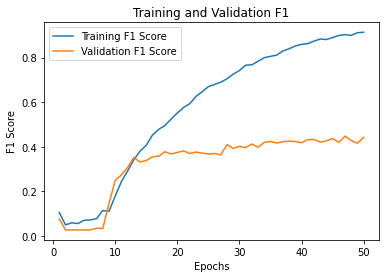

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/roberta_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('roberta-base')

rob_drop_fit_eval_model(epoch_num = 50, dropr = .1, learning = 0.000005)

## GE MLM Model

In [ ]:
#ge mlm model
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/goEmotion_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('monologg/bert-base-cased-goemotions-original')

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/goEmotion_pretrained_500000_10epoch were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/goEmotion_pretrained_500000_10epoch and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tokenize(tokenizer = AutoTokenizer.from_pretrained('monologg/bert-base-cased-goemotions-original'))

({'input_ids': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[101, 164, 112, ...,   0,   0,   0],
        [101, 164, 107, ...,   0,   0,   0],
        [101, 164, 107, ...,   0,   0,   0],
        ...,
        [101, 164, 107, ...,   0,   0,   0],
        [101, 164, 112, ...,   0,   0,   0],
        [101, 164, 107, ...,   0,   0,   0]], dtype=int32)>, 'token_type_ids': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1604, 80), dtype=int32, numpy=
 array([[1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]], dtype=int32)>},
 array([[0, 0, 0, ..., 0, 0, 0],
        [1, 

Epoch 1/15
65/65 [==============================] - 38s 322ms/step - loss: 0.2032 - accuracy: 0.9383 - precision: 0.1321 - recall: 0.0452 - custom_f1: 0.0616 - val_loss: 0.1807 - val_accuracy: 0.9481 - val_precision: 1.0000 - val_recall: 0.0034 - val_custom_f1: 0.0363
Epoch 2/15
65/65 [==============================] - 18s 273ms/step - loss: 0.1551 - accuracy: 0.9516 - precision: 0.5587 - recall: 0.1163 - custom_f1: 0.1952 - val_loss: 0.1551 - val_accuracy: 0.9485 - val_precision: 0.5658 - val_recall: 0.1468 - val_custom_f1: 0.2094
Epoch 3/15
65/65 [==============================] - 18s 274ms/step - loss: 0.1283 - accuracy: 0.9567 - precision: 0.6648 - recall: 0.2729 - custom_f1: 0.3997 - val_loss: 0.1519 - val_accuracy: 0.9510 - val_precision: 0.6068 - val_recall: 0.2423 - val_custom_f1: 0.3054
Epoch 4/15
65/65 [==============================] - 18s 273ms/step - loss: 0.0900 - accuracy: 0.9674 - precision: 0.8018 - recall: 0.4760 - custom_f1: 0.6027 - val_loss: 0.1584 - val_accuracy: 

{'accuracy': 0.9472612738609314,
 'custom_f1': 0.3190423548221588,
 'loss': 0.3590291142463684,
 'precision': 0.4170854389667511,
 'recall': 0.33467742800712585}

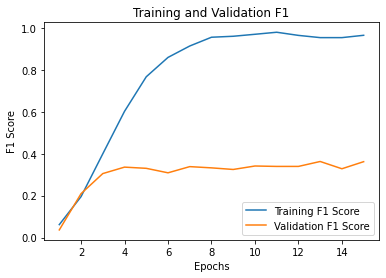

In [ ]:
fit_eval_model(batch_num = 25, learning = 0.00005)

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/goEmotion_pretrained_500000_10epoch were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/goEmotion_pretrained_500000_10epoch and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
65/65 [==============================] - 37s 320ms/step - loss: 0.2041 - accuracy: 0.9377 - precision: 0.1624 - recall: 0.0633 - custom_f1: 0.0940 - val_loss: 0.1880 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0000e+00
Epoch 2/15
65/65 [==============================] - 18s 274ms/step - loss: 0.1725 - accuracy: 0.9496 - precision: 0.4038 - recall: 0.0484 - custom_f1: 0.1009 - val_loss: 0.1731 - val_accuracy: 0.9488 - val_precision: 0.6176 - val_recall: 0.0717 - val_custom_f1: 0.1261
Epoch 3/15
65/65 [==============================] - 18s 278ms/step - loss: 0.1607 - accuracy: 0.9514 - precision: 0.5367 - recall: 0.1258 - custom_f1: 0.2119 - val_loss: 0.1602 - val_accuracy: 0.9481 - val_precision: 0.5510 - val_recall: 0.0922 - val_custom_f1: 0.1509
Epoch 4/15
65/65 [==============================] - 18s 274ms/step - loss: 0.1304 - accuracy: 0.9559 - precision: 0.6378 - recall: 0.2765 - custom_f1: 0.3898 - val_loss: 0.1542 - va

{'accuracy': 0.951702356338501,
 'custom_f1': 0.4431018531322479,
 'loss': 0.3338302969932556,
 'precision': 0.4701986610889435,
 'recall': 0.28629031777381897}

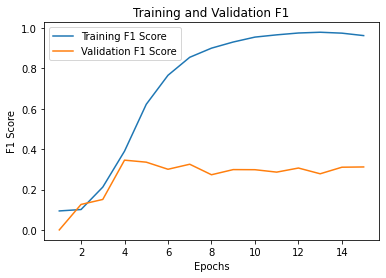

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/goEmotion_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('monologg/bert-base-cased-goemotions-original')

drop_fit_eval_model(dropr = .1, batch_num = 25, learning = 0.00005)

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/goEmotion_pretrained_500000_10epoch were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/goEmotion_pretrained_500000_10epoch and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
31/31 [==============================] - 35s 601ms/step - loss: 0.2291 - accuracy: 0.9312 - precision: 0.0600 - recall: 0.0271 - custom_f1: 0.0292 - val_loss: 0.1864 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 2/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1674 - accuracy: 0.9509 - precision: 0.5435 - recall: 0.0113 - custom_f1: 0.0461 - val_loss: 0.1719 - val_accuracy: 0.9490 - val_precision: 0.7647 - val_recall: 0.0444 - val_custom_f1: 0.1087
Epoch 3/15
31/31 [==============================] - 16s 507ms/step - loss: 0.1544 - accuracy: 0.9528 - precision: 0.6388 - recall: 0.1072 - custom_f1: 0.1942 - val_loss: 0.1536 - val_accuracy: 0.9504 - val_precision: 0.6567 - val_recall: 0.1502 - val_custom_f1: 0.2452
Epoch 4/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1321 - accuracy: 0.9555 - precision: 0.6538 - recall: 0.2308 - custom_f1: 0.3499 - val_loss: 0.1494 - val_ac

{'accuracy': 0.9502221345901489,
 'custom_f1': 0.2581561505794525,
 'loss': 0.2732437551021576,
 'precision': 0.4318181872367859,
 'recall': 0.22983871400356293}

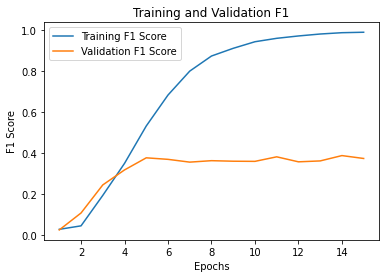

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/goEmotion_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('monologg/bert-base-cased-goemotions-original')

fit_eval_model(learning = 0.00005)

Some layers from the model checkpoint at /content/gdrive/MyDrive/w266final/goEmotion_pretrained_500000_10epoch were not used when initializing TFBertModel: ['mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertModel were not initialized from the model checkpoint at /content/gdrive/MyDrive/w266final/goEmotion_pretrained_500000_10epoch and are newly initialized: ['bert/pooler/dense/bias:0', 'bert/pooler/dense/kernel:0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/15
31/31 [==============================] - 34s 602ms/step - loss: 0.2397 - accuracy: 0.9209 - precision: 0.1231 - recall: 0.0986 - custom_f1: 0.1057 - val_loss: 0.1853 - val_accuracy: 0.9479 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_custom_f1: 0.0263
Epoch 2/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1745 - accuracy: 0.9491 - precision: 0.3534 - recall: 0.0371 - custom_f1: 0.0804 - val_loss: 0.1792 - val_accuracy: 0.9483 - val_precision: 0.6000 - val_recall: 0.0205 - val_custom_f1: 0.0678
Epoch 3/15
31/31 [==============================] - 16s 505ms/step - loss: 0.1660 - accuracy: 0.9517 - precision: 0.5640 - recall: 0.1036 - custom_f1: 0.1845 - val_loss: 0.1642 - val_accuracy: 0.9494 - val_precision: 0.5833 - val_recall: 0.1672 - val_custom_f1: 0.2595
Epoch 4/15
31/31 [==============================] - 16s 506ms/step - loss: 0.1483 - accuracy: 0.9535 - precision: 0.6014 - recall: 0.1959 - custom_f1: 0.3035 - val_loss: 0.1529 - val_ac

{'accuracy': 0.9526275992393494,
 'custom_f1': 0.29059895873069763,
 'loss': 0.2511161267757416,
 'precision': 0.47727271914482117,
 'recall': 0.2540322542190552}

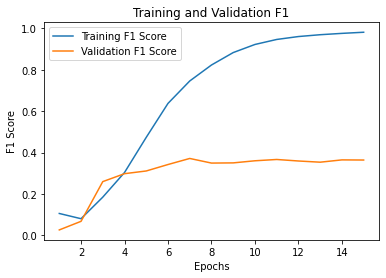

In [ ]:
try:
    del classification_model
except:
    pass

try:
    del model
except:
    pass

tf.keras.backend.clear_session()

from transformers import TFAutoModel, AutoTokenizer, AutoModelForSequenceClassification, Trainer
model = TFAutoModel.from_pretrained("/content/gdrive/MyDrive/w266final/goEmotion_pretrained_500000_10epoch")
tokenizer = AutoTokenizer.from_pretrained('monologg/bert-base-cased-goemotions-original')

drop_fit_eval_model(dropr = .1, learning = 0.00005)

In [ ]:
preds = classification_model.predict([tokenize.x_val.input_ids, tokenize.x_val.token_type_ids, tokenize.x_val.attention_mask], 
                             batch_size=25)

In [ ]:
val_preds_ge_mlm_df = pd.DataFrame(preds)
val_preds_ge_mlm_df.columns = ['admiration', ' amusement', ' anger', ' annoyance', ' approval',
       ' caring', ' confusion', ' curiosity', ' desire', ' disappointment',
       ' disapproval', ' disgust', ' embarrassment', ' excitement', ' fear',
       ' gratitude', ' grief', ' joy', ' love', ' nervousness', ' optimism',
       ' pride', ' realization', ' relief', 'remorse', ' sadness', ' surprise',
       ' neutral']

In [ ]:
val_preds_ge_mlm_df

,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,0.000254,0.000004,0.000008,0.000020,0.000195,0.000002,0.000013,6.425328e-06,0.000004,0.000008,...,0.000013,0.000002,2.702971e-06,0.000005,0.000004,0.000003,0.000002,7.825979e-07,0.000001,1.000000e+00
1,0.405768,0.037534,0.002905,0.000103,0.002891,0.001917,0.976136,2.747035e-01,0.000106,0.000204,...,0.000299,0.000217,3.311596e-04,0.006415,0.113526,0.000831,0.000830,2.334888e-05,0.001501,2.930098e-07
2,0.000132,0.000004,0.000048,0.000053,0.000977,0.000022,0.000017,6.561076e-05,0.000091,0.000141,...,0.000005,0.000011,1.311502e-04,0.000010,0.002272,0.000148,0.000092,2.999965e-04,0.000003,9.301003e-04
3,0.000230,0.000077,0.000247,0.000592,0.000954,0.000084,0.031516,9.999995e-01,0.000584,0.000124,...,0.000058,0.001903,1.213255e-02,0.000929,0.003132,0.000827,0.000085,1.768673e-05,0.001400,8.760654e-06
4,0.000021,0.000003,0.000030,0.000070,0.000004,0.000016,0.000003,7.122394e-07,0.000040,0.000608,...,0.000012,0.000040,4.563194e-04,0.000021,0.000003,0.000009,0.000089,1.967746e-04,0.000008,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.001744,0.000105,0.000063,0.000064,0.000021,0.000047,0.000008,9.118667e-04,0.000651,0.000338,...,0.000673,0.000254,5.252563e-04,0.000041,0.956523,0.000355,0.000136,2.331257e-03,0.000040,9.981971e-01
197,0.000152,0.000004,0.000025,0.000748,0.000252,0.000069,0.000159,9.070383e-05,0.000112,0.000041,...,0.000123,0.000381,1.698340e-01,0.000197,0.000078,0.000135,0.000008,3.655463e-05,0.000032,9.663326e-01
198,0.006089,0.000012,0.000155,0.000134,0.000210,0.000055,0.000319,9.999955e-01,0.000558,0.000151,...,0.000036,0.000380,2.308788e-03,0.000199,0.002733,0.000093,0.000106,5.998195e-06,0.000212,3.118276e-04
199,0.001574,0.000011,0.000109,0.000011,0.000785,0.000070,0.000035,1.437688e-02,0.000005,0.000166,...,0.000080,0.000019,1.369308e-05,0.000035,0.863677,0.000079,0.000014,1.668930e-05,0.000012,3.953825e-01


In [ ]:
val_preds_ge_mlm_df.to_csv('ge_mlm_val_preds.csv')